# Fix pathing

In [1]:
import sys


sys.path.append("..")


In [2]:
import constants

import os


constants.PROJECT_DIRECTORY_PATH = os.path.dirname(os.path.dirname(constants.PROJECT_DIRECTORY_PATH))


# Imports

In [3]:
import datahandler
import plotter
import utils

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


# Constants

In [4]:
data_preprocessor = datahandler.DataPreprocessorOUS_V2()
data_preprocessor.execute()

data_loader = datahandler.DataLoader(datahandler.DataPreprocessorOUS_V2)
data_loader.execute(clean=False, processed=False, enhanced=False)


Enhancing dataset: 100%|██████████| 2/2 [00:00<?, ?it/s]


# Methods

In [5]:
def count_wrong_timestamps(dataframe: pd.DataFrame):
    datetime_columns = [
        "time_call_received", "time_incident_created", "time_resource_appointed",
        "time_ambulance_dispatch_to_scene", "time_ambulance_arrived_at_scene", "time_ambulance_dispatch_to_hospital",
        "time_ambulance_arrived_at_hospital", "time_ambulance_available"
    ]

    # Count violations for each pair of datetime columns
    for i in range(len(datetime_columns) - 1):
        first_col = datetime_columns[i]
        second_col = datetime_columns[i + 1]
        
        # Count where the first date is after the second date
        count = dataframe[dataframe[first_col] > dataframe[second_col]].shape[0]
        print(f"{first_col} to {second_col}: {count}")


In [6]:
def find_first_problematic_row(dataframe: pd.DataFrame):
    # Convert columns to datetime if they're not already
    dataframe['time_call_received'] = pd.to_datetime(dataframe['time_call_received'])
    dataframe['time_incident_created'] = pd.to_datetime(dataframe['time_incident_created'])

    # Find the first row where time_call_received is after time_incident_created
    problematic_rows = dataframe[dataframe['time_call_received'] > dataframe['time_incident_created']]
    if not problematic_rows.empty:
        first_problematic_index = problematic_rows.index[0]
        print(f"First problematic row index: {first_problematic_index}")
        return first_problematic_index
    else:
        print("No problematic rows found.")
        return None


In [5]:
def outlier_plotting(
    dataframe: pd.DataFrame,
    column_start: str,
    column_end: str,
    triage_impression: str = None,
    log_scale: bool = False,
    IQR_multiplier: float = 1.5,
    z_score_threshold: float = 3,
    bounds_to_use: str = "z",
    cancelled: bool = False,
    percentage_threshold: float = None
):
    plotter.plot_time_difference_distribution(
        dataframe,
        column_start,
        column_end,
        triage_impression,
        log_scale,
        cancelled,
        percentage_threshold
    )
    if percentage_threshold is not None:
        plotter.plot_percentage_below_threshold_per_hour(
            dataframe,
            column_start,
            column_end,
            percentage_threshold,
            triage_impression,
            cancelled
        )

    before_size = dataframe.shape[0]

    dataframe = data_preprocessor._drop_outside_bounds(
        dataframe,
        column_start,
        column_end,
        triage_impression,
        z_score_threshold,
        IQR_multiplier,
        bounds_to_use,
        cancelled,
        verbose=True
    )

    plotter.plot_time_difference_distribution(
        dataframe,
        column_start,
        column_end,
        triage_impression,
        log_scale,
        cancelled,
        percentage_threshold
    )
    if percentage_threshold is not None:
        plotter.plot_percentage_below_threshold_per_hour(
            dataframe,
            column_start,
            column_end,
            percentage_threshold,
            triage_impression,
            cancelled
        )

    print(f"\n\nDropped {before_size - dataframe.shape[0]} ({((before_size - dataframe.shape[0]) / before_size) * 100}%) rows")


# Main

In [8]:
count_wrong_timestamps(data_loader.processed_incidents_df)


TypeError: 'NoneType' object is not subscriptable

In [ ]:
dataframe = data_preprocessor._remove_duplicates(data_loader.processed_incidents_df)
dataframe = data_preprocessor._remove_incomplete_years(dataframe)
dataframe = data_preprocessor._remove_outside_region(dataframe)
dataframe = data_preprocessor._remove_other_resource_types(dataframe)
dataframe = data_preprocessor._count_resources_sent(dataframe)
dataframe = data_preprocessor._remove_extra_resources(dataframe)

dataframe = dataframe.sort_values(by="time_call_received")


AttributeError: 'NoneType' object has no attribute 'drop_duplicates'

In [ ]:
count_wrong_timestamps(dataframe)


In [ ]:
dataframe["triage_impression_during_call"].value_counts()


In [ ]:
dataframe = data_preprocessor._remove_other_triage_impressions(dataframe)


In [ ]:
print(dataframe["triage_impression_during_call"].value_counts())

dataframe.info()


In [ ]:
count_wrong_timestamps(dataframe)


In [ ]:
dataframe = data_preprocessor._remove_wrong_timestamps(dataframe)


In [ ]:
dataframe["triage_impression_during_call"].value_counts()


In [ ]:
count_wrong_timestamps(dataframe)


In [ ]:
dataframe = data_preprocessor._fix_timestamps(dataframe)


In [ ]:
count_wrong_timestamps(dataframe)


In [6]:
data_loader.execute(clean=False, processed=True, enhanced=False)

dataframe = data_preprocessor._remove_duplicates(data_loader.processed_incidents_df)
dataframe = data_preprocessor._remove_incomplete_years(dataframe)
dataframe = data_preprocessor._remove_outside_region(dataframe)
dataframe = data_preprocessor._remove_other_resource_types(dataframe)
dataframe = data_preprocessor._count_resources_sent(dataframe)
dataframe = data_preprocessor._remove_extra_resources(dataframe)
dataframe = data_preprocessor._remove_other_triage_impressions(dataframe)
dataframe = data_preprocessor._remove_wrong_timestamps(dataframe)
dataframe = data_preprocessor._fix_timestamps(dataframe)
dataframe = data_preprocessor._remove_na(dataframe)


Loading dataset: 100%|██████████| 2/2 [00:07<00:00,  3.80s/it]


# A Incidents

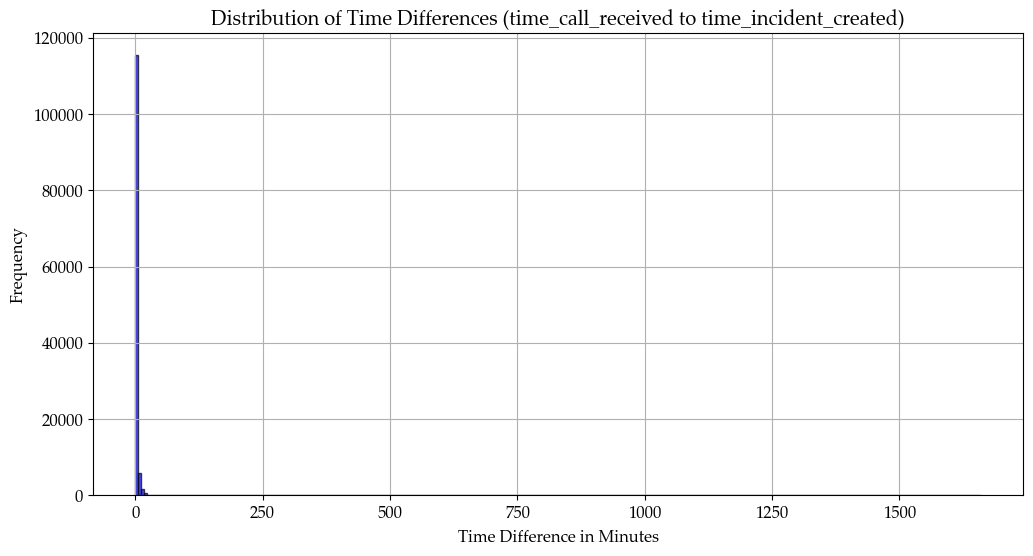

Mean time difference: 2.25839191204697 minutes
Median time difference: 1.3 minutes
Standard deviation of time difference: 8.103950867461098 minutes
Maximum time difference: 1659.9166666666667 minutes
Minimum time difference: 0.0 minutes
Percentage of time differences below 1.5 minutes: 57.91%


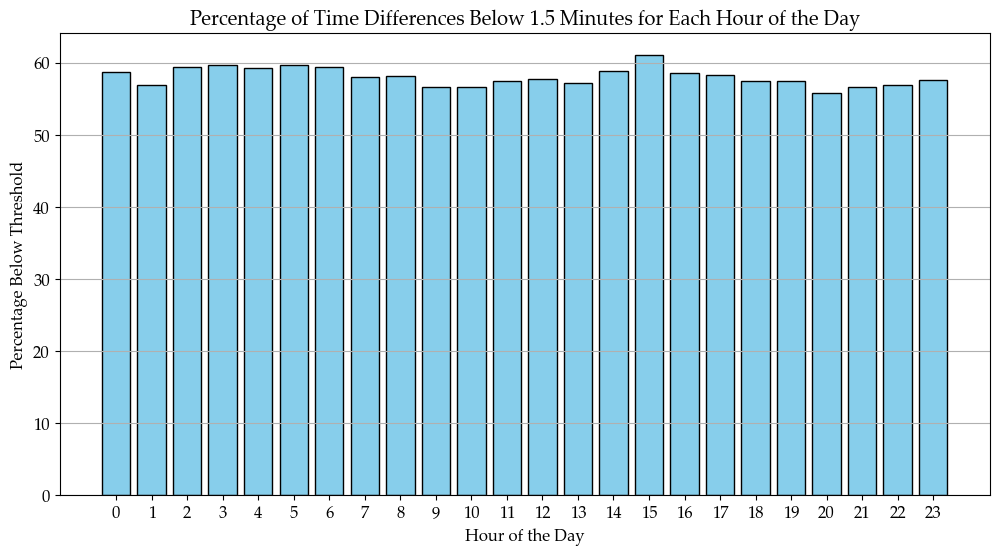

Suggested IQR upper bound for dropping rows: 586.9 seconds
Suggested IQR lower bound for dropping rows: 10.4 seconds
Suggested Z-Score upper bound for dropping rows: 1081.46 seconds
Suggested Z-Score lower bound for dropping rows: 5.8 seconds


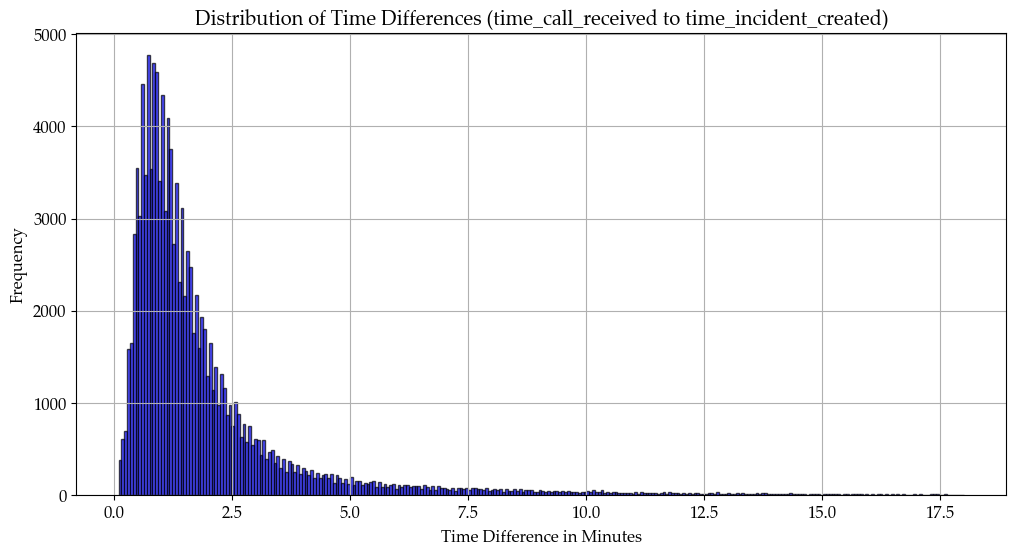

Mean time difference: 2.008165105033631 minutes
Median time difference: 1.3 minutes
Standard deviation of time difference: 2.260283811548909 minutes
Maximum time difference: 18.016666666666666 minutes
Minimum time difference: 0.1 minutes
Percentage of time differences below 1.5 minutes: 58.19%


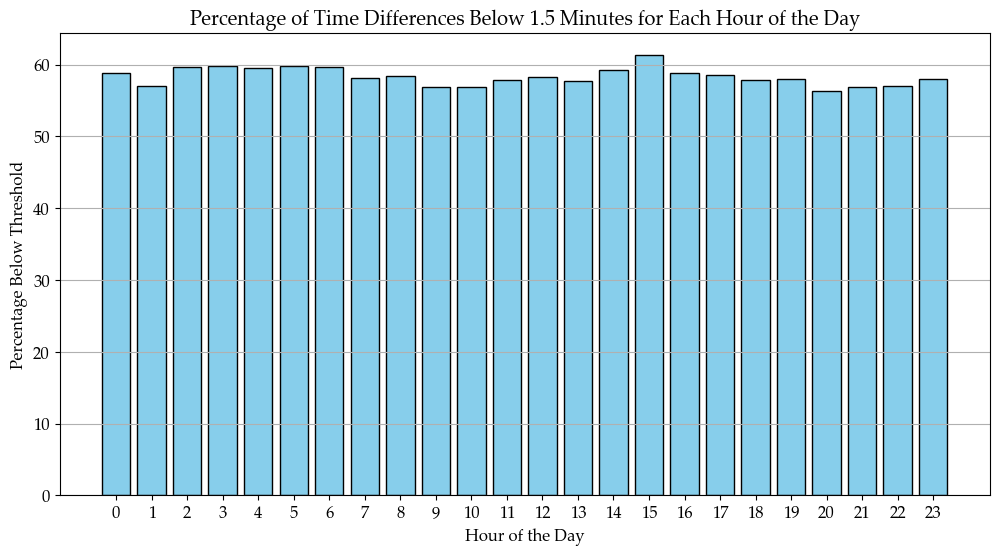



Dropped 1092 (0.37530416133954714%) rows


In [7]:
outlier_plotting(
    dataframe,
    triage_impression="A",
    column_start="time_call_received",
    column_end="time_incident_created",
    log_scale=False,
    z_score_threshold=3,
    bounds_to_use="z",
    percentage_threshold=1.5
)


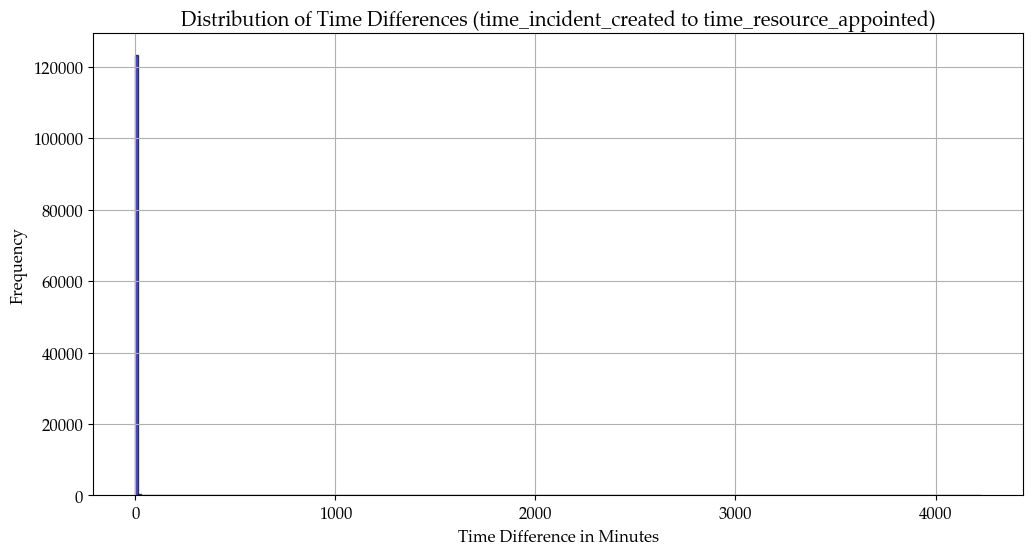

Mean time difference: 1.2798516833509452 minutes
Median time difference: 0.5166666666666667 minutes
Standard deviation of time difference: 21.936319118961816 minutes
Maximum time difference: 4226.033333333334 minutes
Minimum time difference: 0.0 minutes
Percentage of time differences below 0.5 minutes: 49.13%


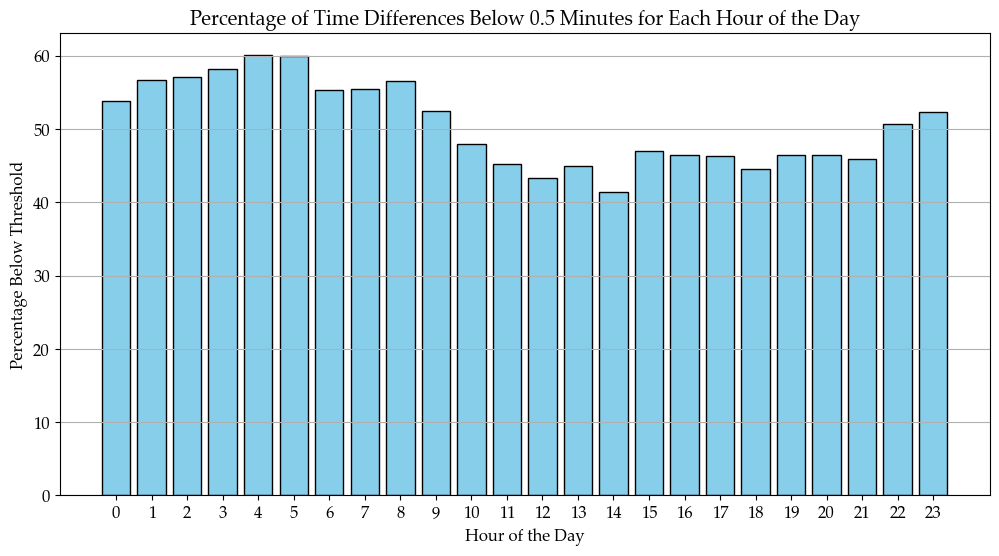

Suggested IQR upper bound for dropping rows: 273.25 seconds
Suggested IQR lower bound for dropping rows: 3.16 seconds
Suggested Z-Score upper bound for dropping rows: 518.29 seconds
Suggested Z-Score lower bound for dropping rows: 1.46 seconds


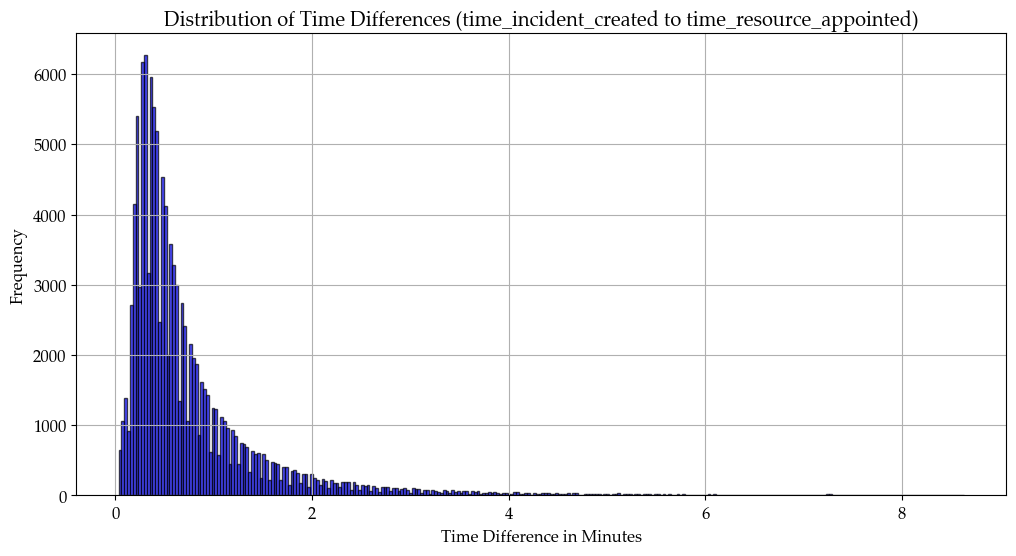

Mean time difference: 0.8024992504156787 minutes
Median time difference: 0.5166666666666667 minutes
Standard deviation of time difference: 0.8981884940998798 minutes
Maximum time difference: 8.633333333333333 minutes
Minimum time difference: 0.03333333333333333 minutes
Percentage of time differences below 0.5 minutes: 49.57%


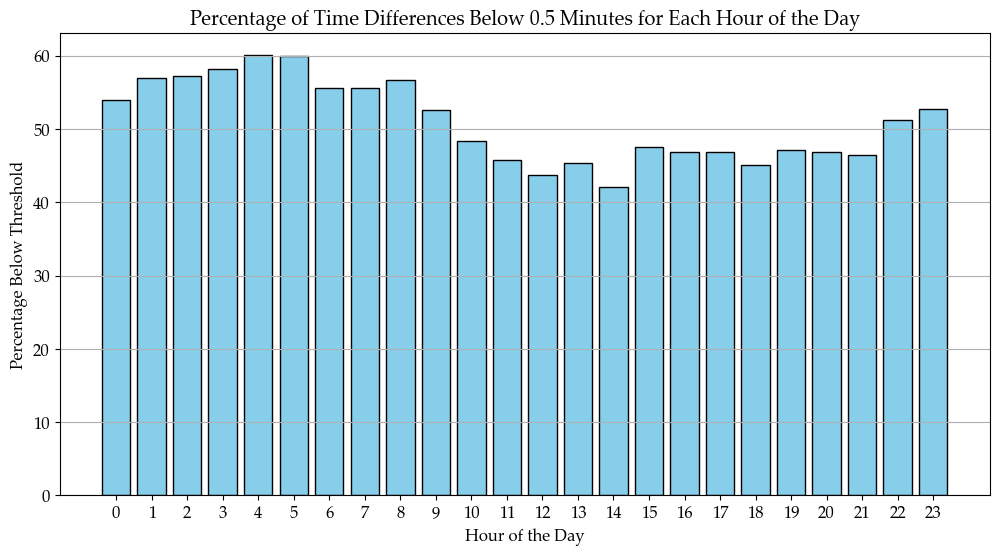



Dropped 1679 (0.5770473323160253%) rows


In [8]:
outlier_plotting(
    dataframe,
    triage_impression="A",
    column_start="time_incident_created",
    column_end="time_resource_appointed",
    log_scale=False,
    z_score_threshold=3,
    bounds_to_use="z",
    percentage_threshold=0.5
)


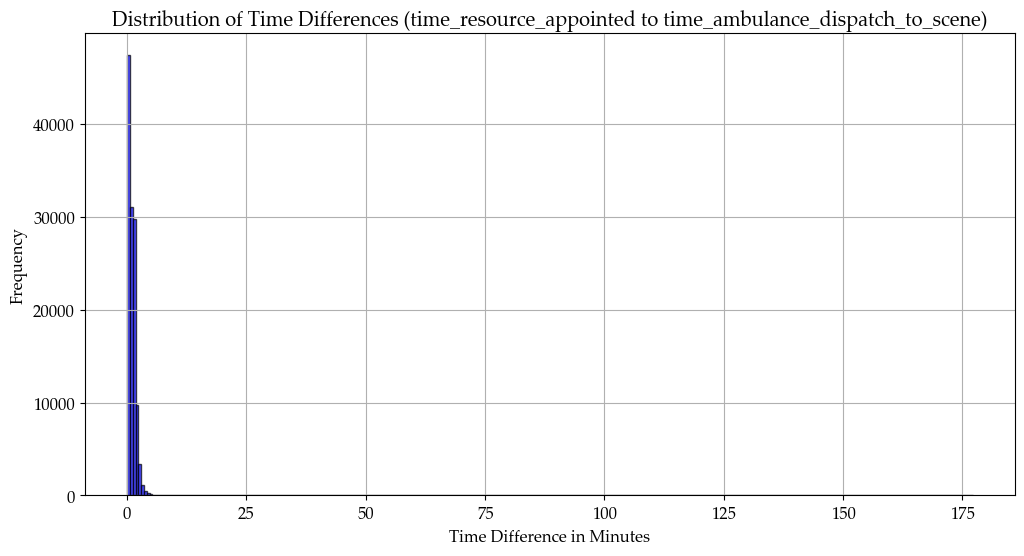

Mean time difference: 0.9645743425103587 minutes
Median time difference: 0.9333333333333333 minutes
Standard deviation of time difference: 1.2233929385713225 minutes
Maximum time difference: 177.1 minutes
Minimum time difference: 0.0 minutes
Percentage of time differences below 1 minutes: 53.77%


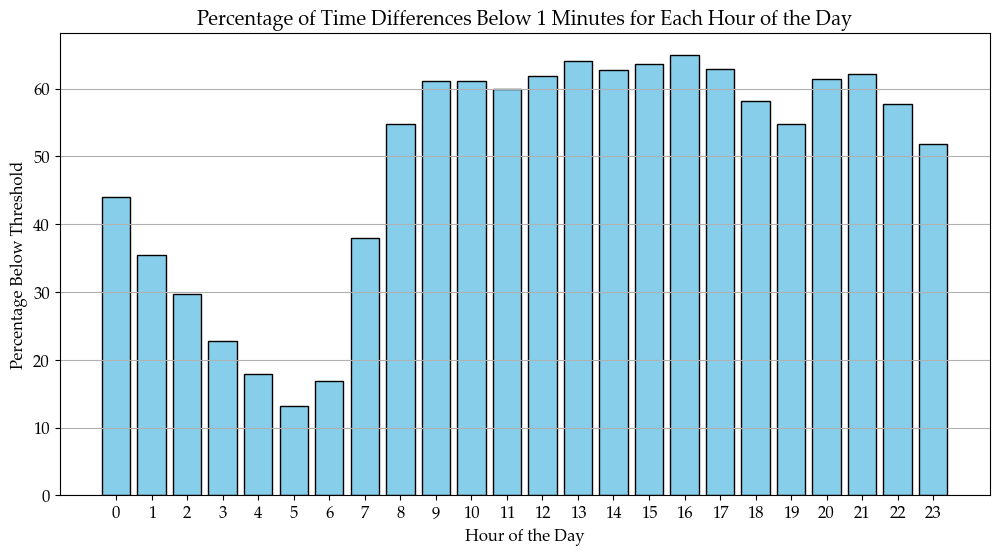

Suggested IQR upper bound for dropping rows: 2105.43 seconds
Suggested IQR lower bound for dropping rows: -0.6 seconds
Suggested Z-Score upper bound for dropping rows: 1357.29 seconds
Suggested Z-Score lower bound for dropping rows: -0.17 seconds


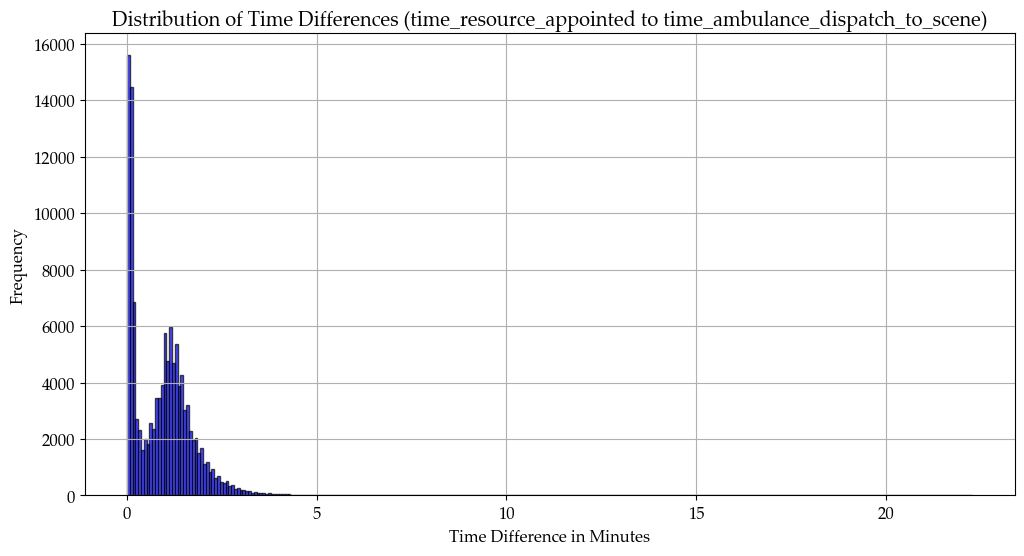

Mean time difference: 0.9535442452409002 minutes
Median time difference: 0.9333333333333333 minutes
Standard deviation of time difference: 0.9029410576113759 minutes
Maximum time difference: 22.283333333333335 minutes
Minimum time difference: 0.0 minutes
Percentage of time differences below 1 minutes: 53.78%


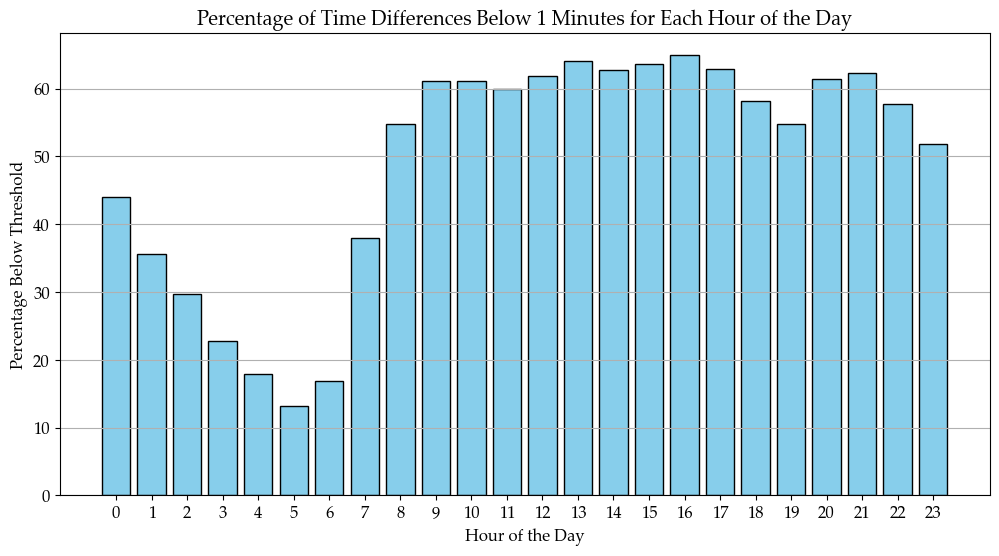



Dropped 31 (0.010654239012386412%) rows


In [13]:
outlier_plotting(
    dataframe,
    triage_impression="A",
    column_start="time_resource_appointed",
    column_end="time_ambulance_dispatch_to_scene",
    log_scale=False,
    z_score_threshold=3,
    bounds_to_use="z",
    percentage_threshold=1
)


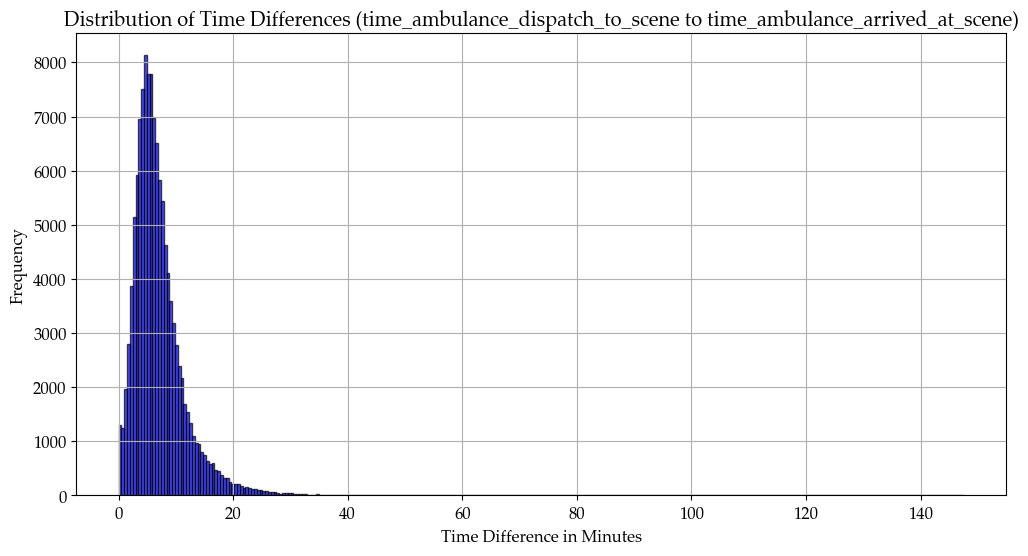

Mean time difference: 7.059936220614293 minutes
Median time difference: 6.016666666666667 minutes
Standard deviation of time difference: 4.966202361645143 minutes
Maximum time difference: 147.61666666666667 minutes
Minimum time difference: 0.0 minutes
Percentage of time differences below 10 minutes: 82.00%


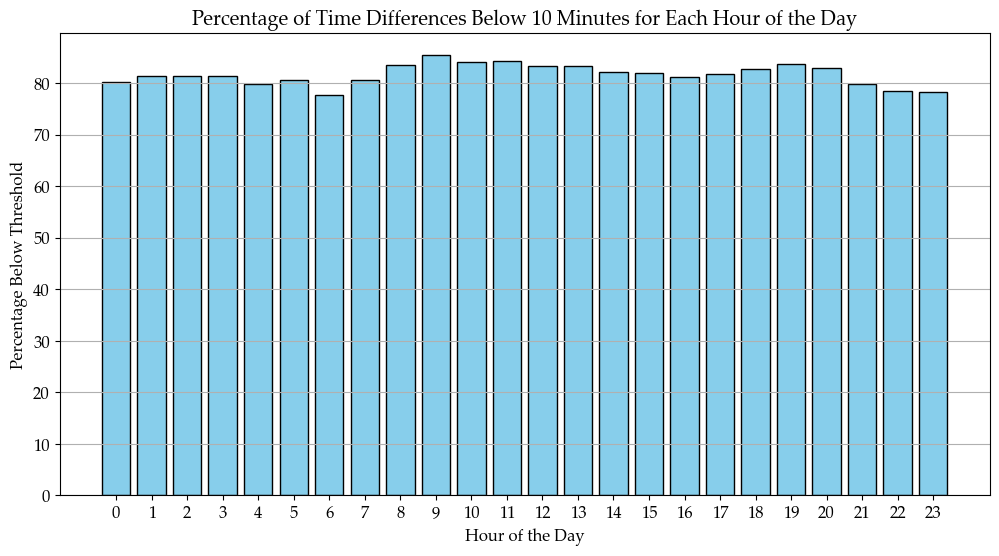

Suggested IQR upper bound for dropping rows: 1663.87 seconds
Suggested IQR lower bound for dropping rows: 76.09 seconds
Suggested Z-Score upper bound for dropping rows: 3386.52 seconds
Suggested Z-Score lower bound for dropping rows: 33.06 seconds


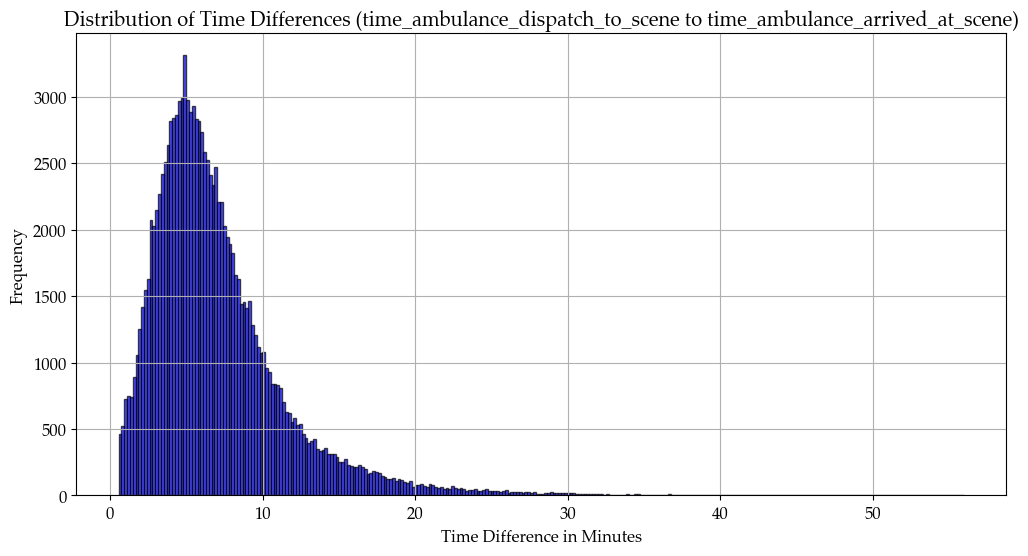

Mean time difference: 7.106213264106584 minutes
Median time difference: 6.05 minutes
Standard deviation of time difference: 4.690436944839943 minutes
Maximum time difference: 56.0 minutes
Minimum time difference: 0.5666666666666667 minutes
Percentage of time differences below 10 minutes: 81.83%


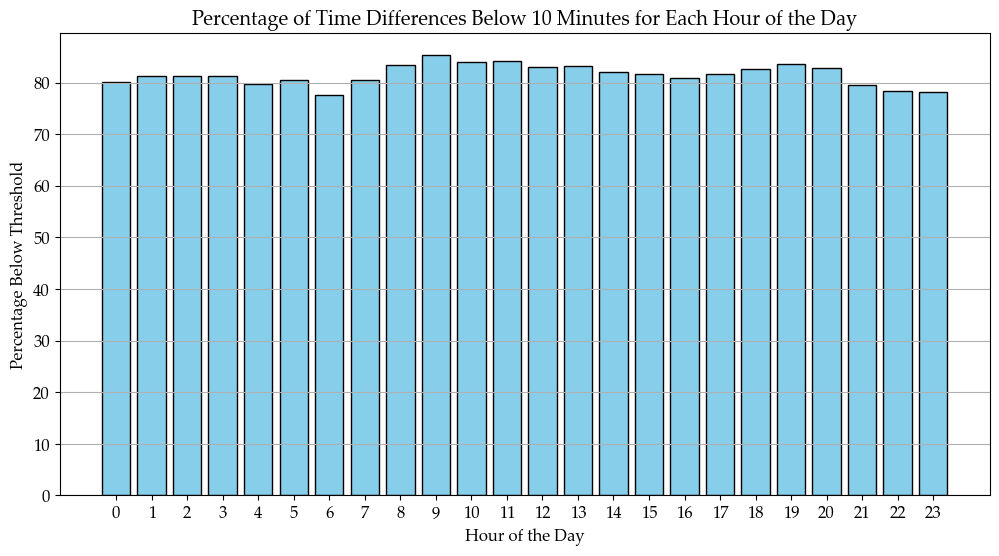



Dropped 1473 (0.5062481956530706%) rows


In [14]:
outlier_plotting(
    dataframe,
    triage_impression="A",
    column_start="time_ambulance_dispatch_to_scene",
    column_end="time_ambulance_arrived_at_scene",
    log_scale=False,
    z_score_threshold=3,
    bounds_to_use="z",
    percentage_threshold=10
)


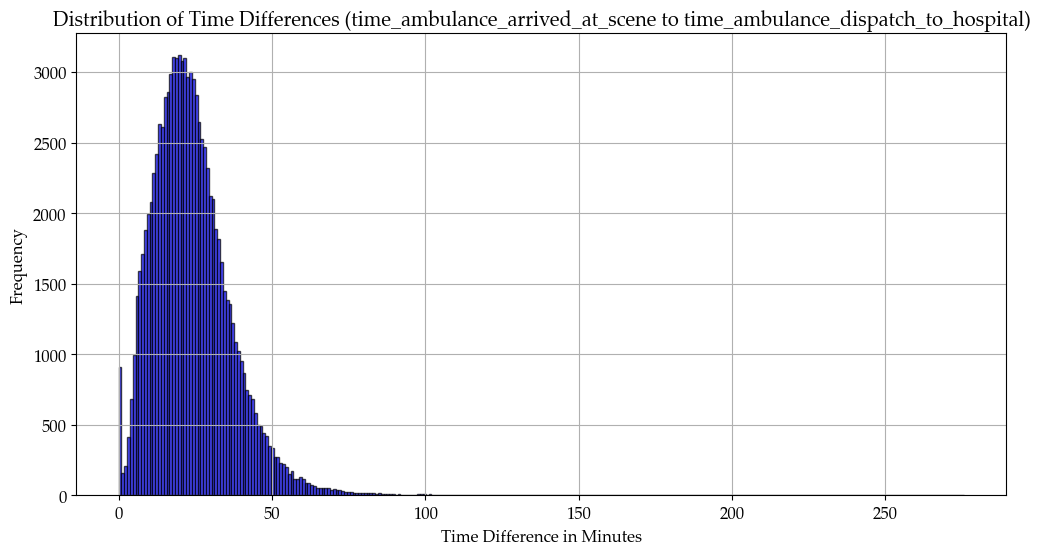

Mean time difference: 23.893891302041084 minutes
Median time difference: 22.216666666666665 minutes
Standard deviation of time difference: 13.169339858588566 minutes
Maximum time difference: 275.76666666666665 minutes
Minimum time difference: 0.0 minutes
Percentage of time differences below 30 minutes: 73.18%


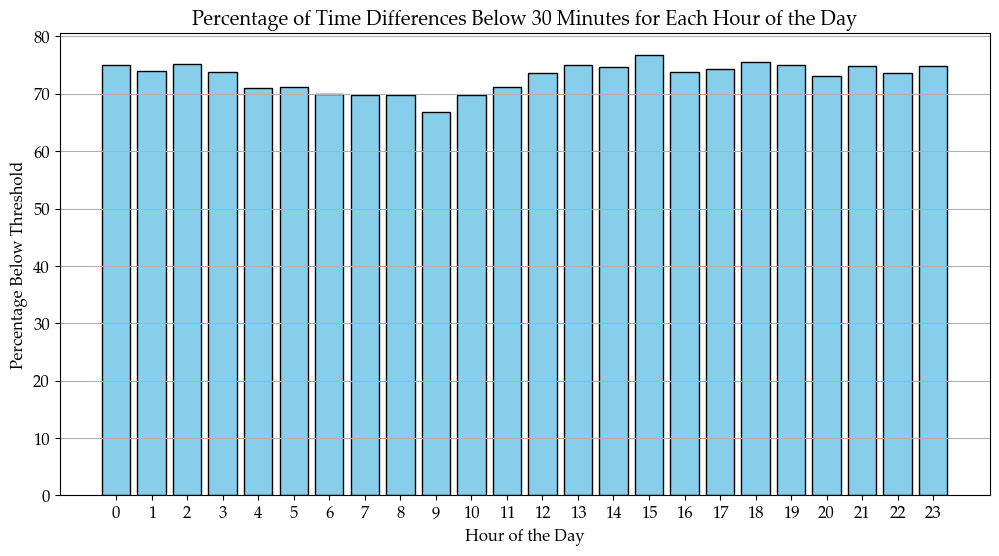

Suggested IQR upper bound for dropping rows: 5511.53 seconds
Suggested IQR lower bound for dropping rows: 297.53 seconds
Suggested Z-Score upper bound for dropping rows: 12742.11 seconds
Suggested Z-Score lower bound for dropping rows: 108.8 seconds


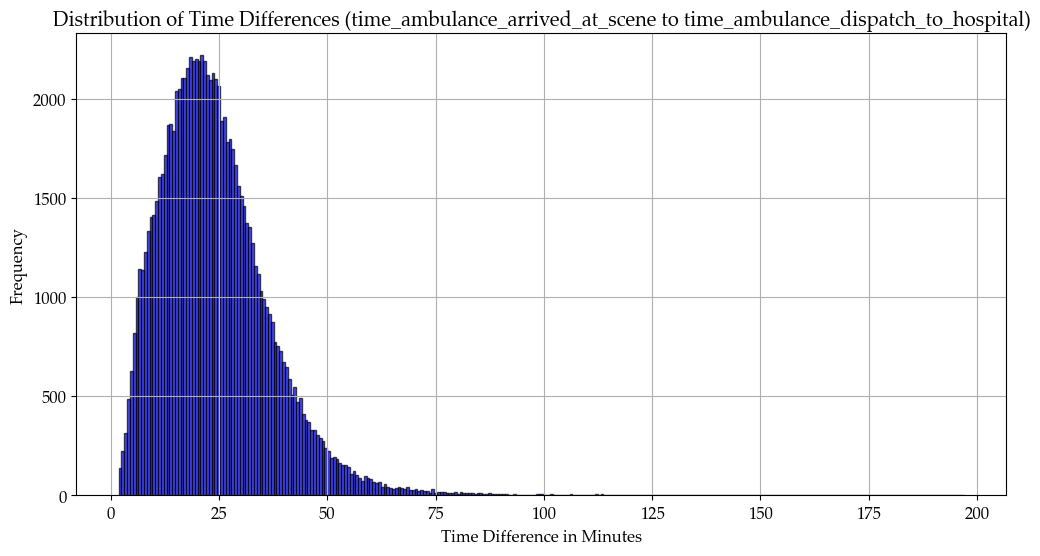

Mean time difference: 24.147160072122958 minutes
Median time difference: 22.383333333333333 minutes
Standard deviation of time difference: 12.942456412792717 minutes
Maximum time difference: 197.05 minutes
Minimum time difference: 1.8166666666666667 minutes
Percentage of time differences below 30 minutes: 72.88%


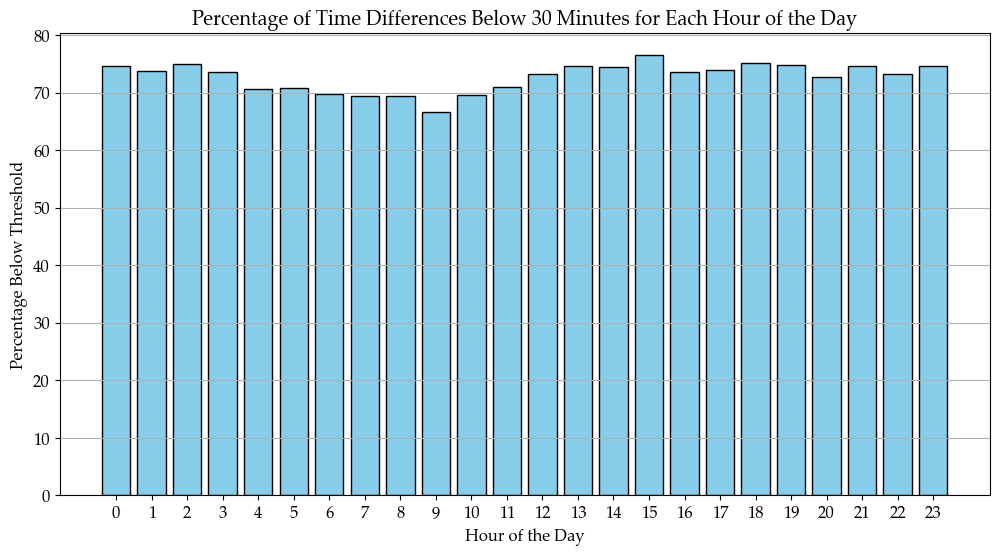



Dropped 1066 (0.36636834797431983%) rows


In [15]:
outlier_plotting(
    dataframe,
    triage_impression="A",
    column_start="time_ambulance_arrived_at_scene",
    column_end="time_ambulance_dispatch_to_hospital",
    log_scale=False,
    z_score_threshold=3,
    bounds_to_use="z",
    percentage_threshold=30
)


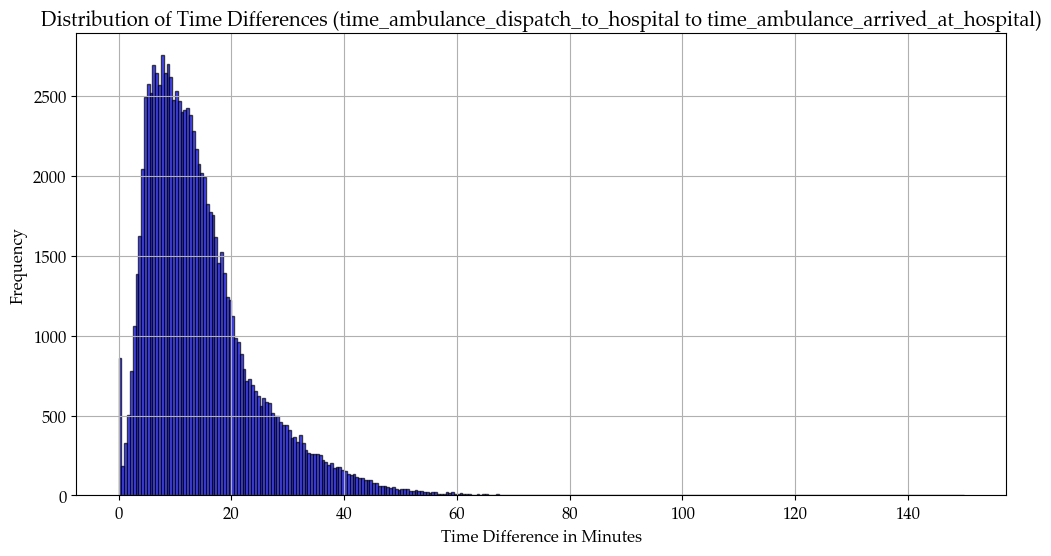

Mean time difference: 14.50552543393953 minutes
Median time difference: 12.3 minutes
Standard deviation of time difference: 9.83325580528385 minutes
Maximum time difference: 150.0 minutes
Minimum time difference: 0.016666666666666666 minutes
Percentage of time differences below 20 minutes: 78.44%


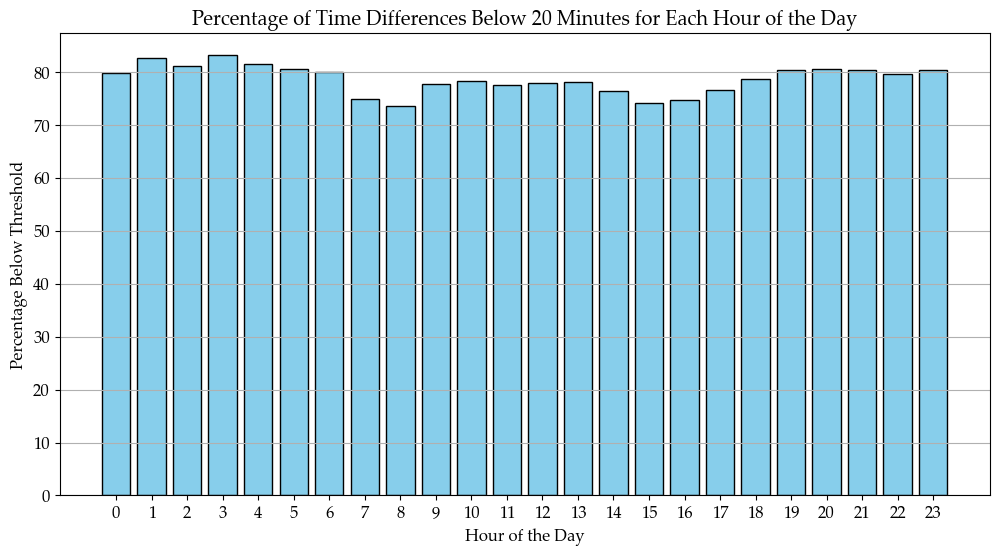

Suggested IQR upper bound for dropping rows: 4372.56 seconds
Suggested IQR lower bound for dropping rows: 115.21 seconds
Suggested Z-Score upper bound for dropping rows: 8174.51 seconds
Suggested Z-Score lower bound for dropping rows: 55.38 seconds


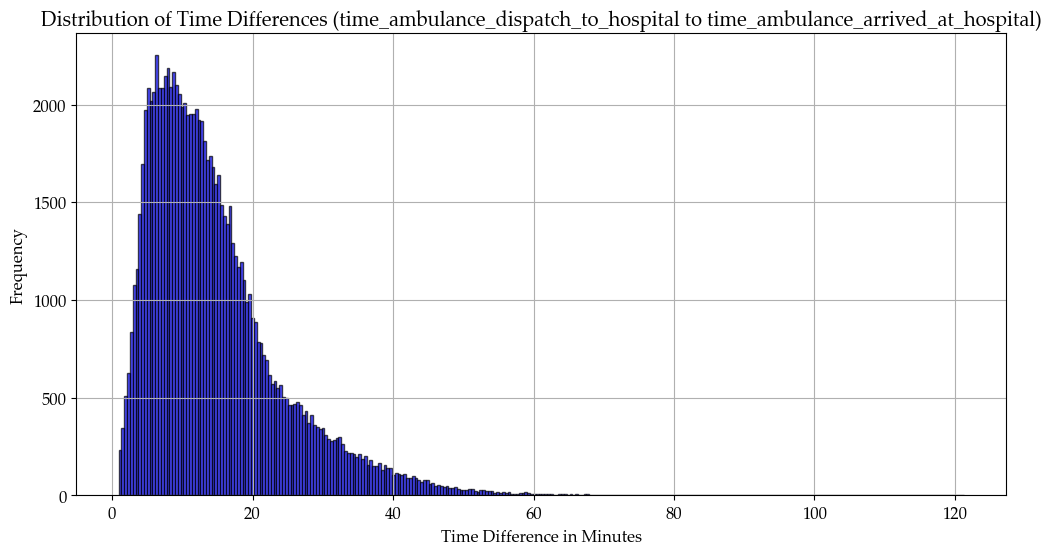

Mean time difference: 14.652293125810635 minutes
Median time difference: 12.4 minutes
Standard deviation of time difference: 9.756080899754659 minutes
Maximum time difference: 121.31666666666666 minutes
Minimum time difference: 0.9333333333333333 minutes
Percentage of time differences below 20 minutes: 78.22%


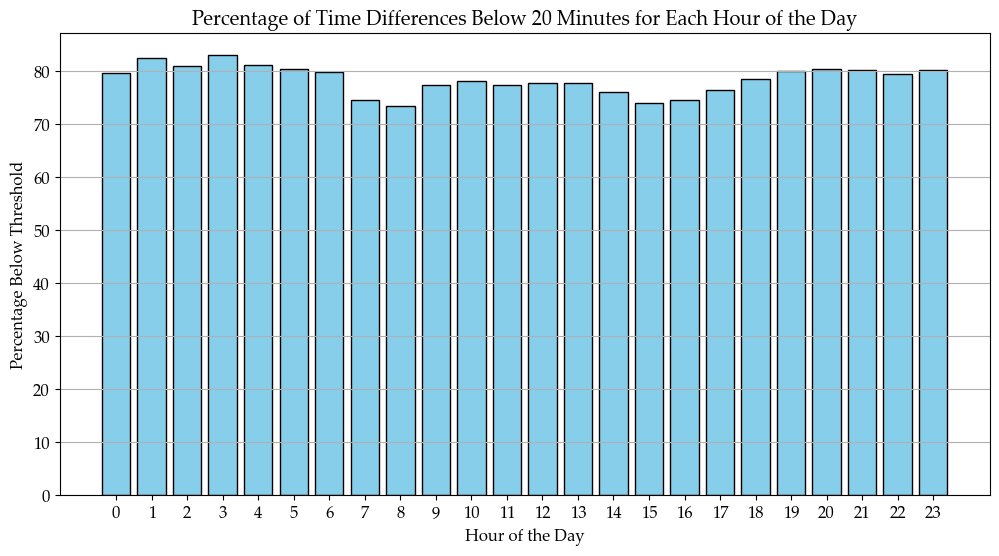



Dropped 1008 (0.3464346104672743%) rows


In [17]:
outlier_plotting(
    dataframe,
    triage_impression="A",
    column_start="time_ambulance_dispatch_to_hospital",
    column_end="time_ambulance_arrived_at_hospital",
    log_scale=False,
    z_score_threshold=3,
    bounds_to_use="z",
    percentage_threshold=20
)


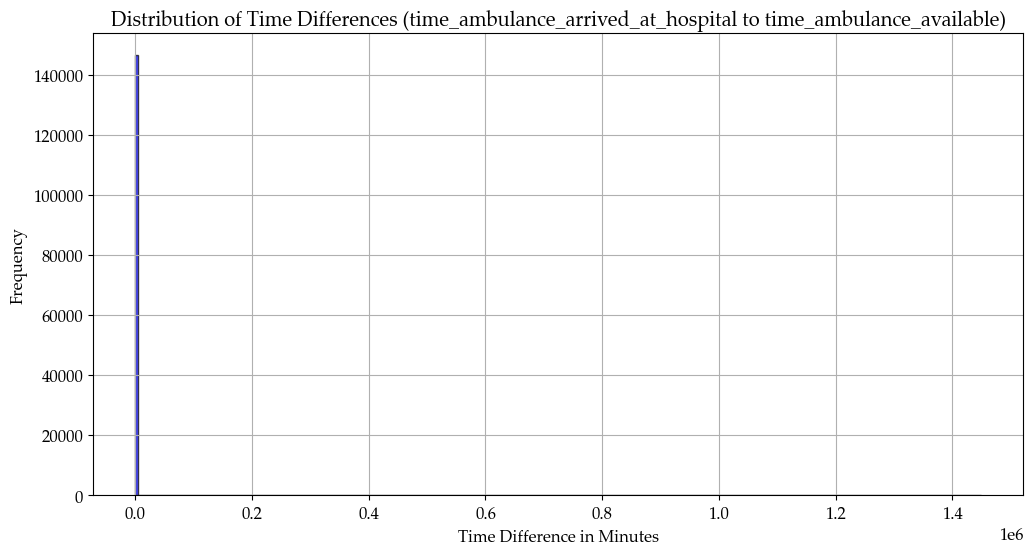

Mean time difference: 26.180505724843457 minutes
Median time difference: 13.366666666666667 minutes
Standard deviation of time difference: 3784.977112861286 minutes
Maximum time difference: 1448664.0666666667 minutes
Minimum time difference: 0.0 minutes
Suggested IQR upper bound for dropping rows: 3186.8 seconds
Suggested IQR lower bound for dropping rows: 202.48 seconds
Suggested Z-Score upper bound for dropping rows: 7435.67 seconds
Suggested Z-Score lower bound for dropping rows: 79.09 seconds


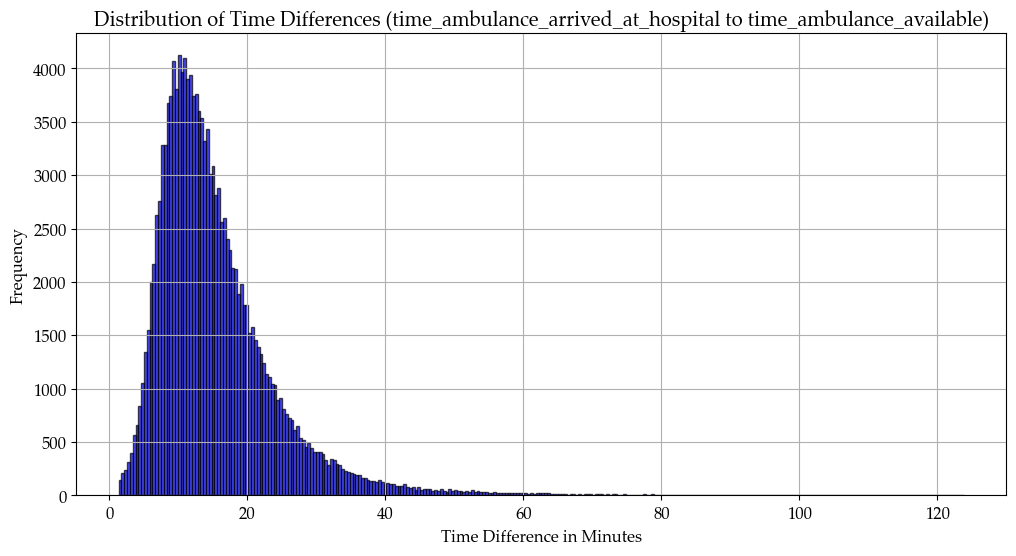

Mean time difference: 15.615779070169971 minutes
Median time difference: 13.45 minutes
Standard deviation of time difference: 9.558550710457729 minutes
Maximum time difference: 123.86666666666666 minutes
Minimum time difference: 1.3333333333333333 minutes


Dropped 2061 (0.7083350517589805%) rows


In [26]:
outlier_plotting(
    dataframe,
    triage_impression="A",
    column_start="time_ambulance_arrived_at_hospital",
    column_end="time_ambulance_available",
    log_scale=False,
    z_score_threshold=3,
    bounds_to_use="z"
)


123969
26586


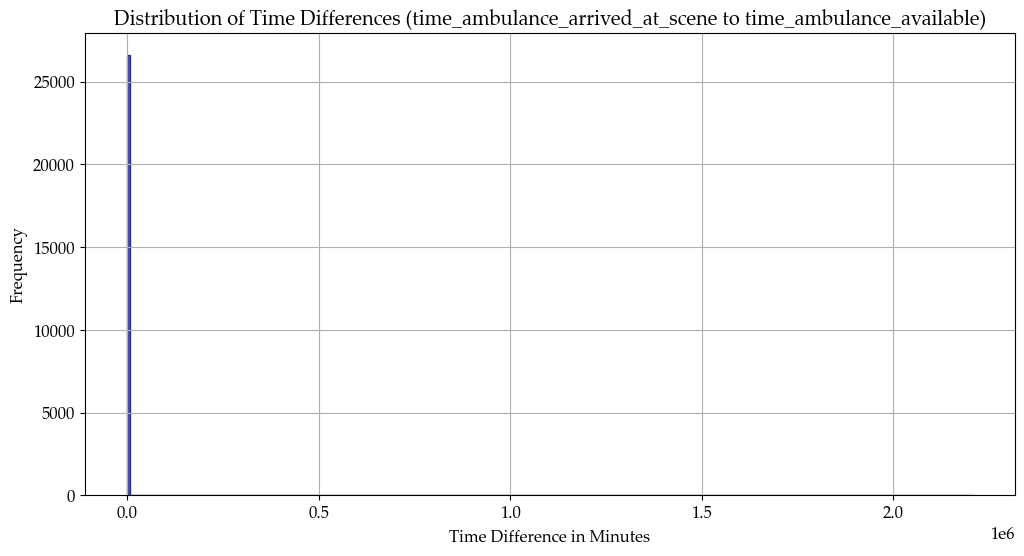

Mean time difference: 193.94529263522156 minutes
Median time difference: 29.633333333333333 minutes
Standard deviation of time difference: 18346.506719230794 minutes
Maximum time difference: 2207535.8333333335 minutes
Minimum time difference: 0.0 minutes
Percentage of time differences below 30 minutes: 50.90%


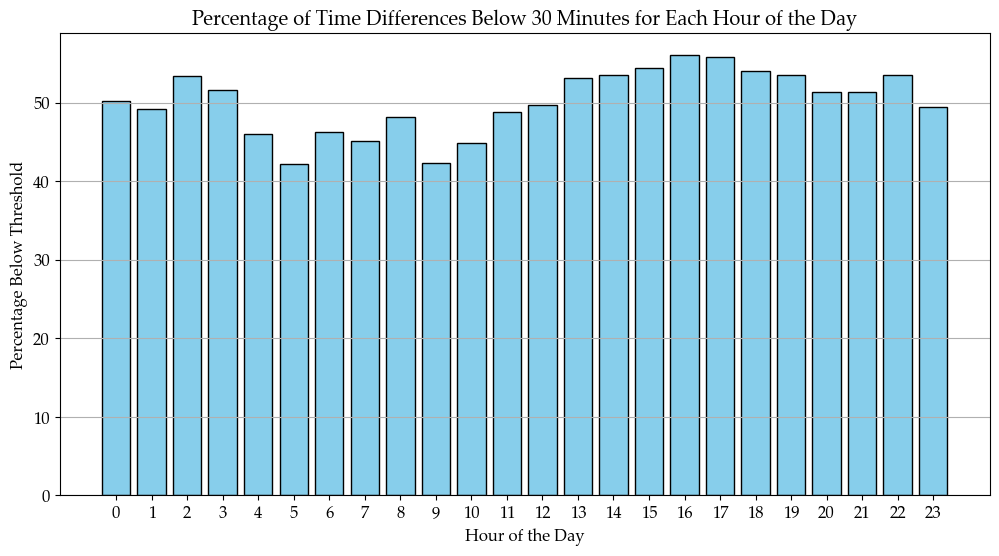

Suggested IQR upper bound for dropping rows: 10258.24 seconds
Suggested IQR lower bound for dropping rows: 271.35 seconds
Suggested Z-Score upper bound for dropping rows: 25580.12 seconds
Suggested Z-Score lower bound for dropping rows: 88.84 seconds
123593
26210


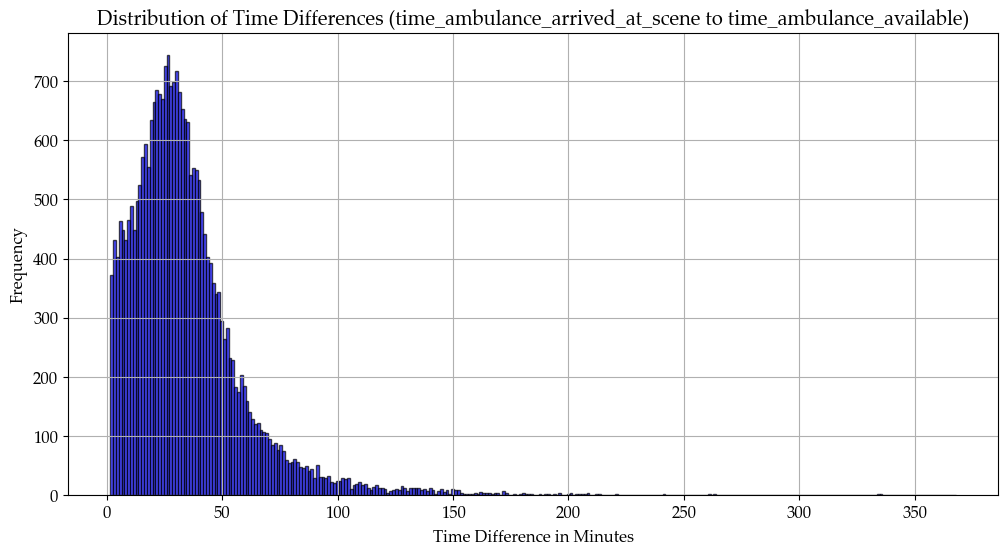

Mean time difference: 35.00164568230955 minutes
Median time difference: 29.933333333333334 minutes
Standard deviation of time difference: 26.969124049057218 minutes
Maximum time difference: 367.78333333333336 minutes
Minimum time difference: 1.4833333333333334 minutes
Percentage of time differences below 30 minutes: 50.24%


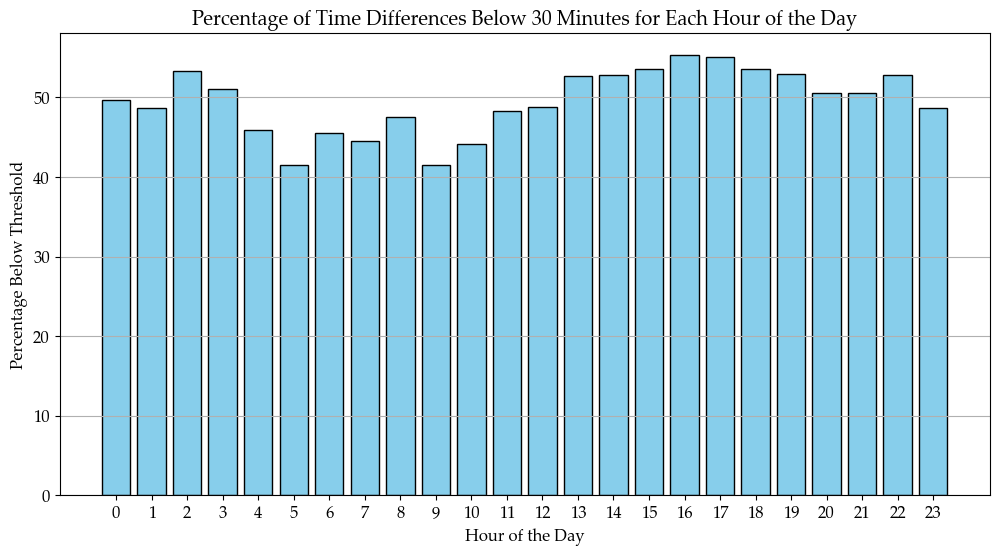



Dropped 376 (0.12922560866636423%) rows


In [18]:
# cancelled
outlier_plotting(
    dataframe,
    triage_impression="A",
    column_start="time_ambulance_arrived_at_scene",
    column_end="time_ambulance_available",
    log_scale=False,
    z_score_threshold=3,
    bounds_to_use="z",
    cancelled=True,
    percentage_threshold=30
)


In [ ]:
dataframe.shape


# H Incidents

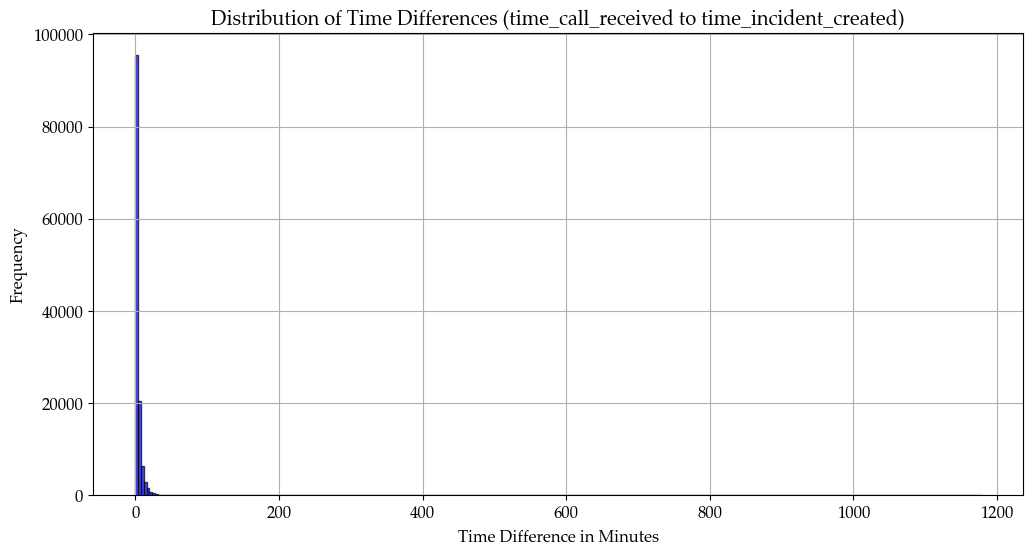

Mean time difference: 4.053983615627084 minutes
Median time difference: 2.2 minutes
Standard deviation of time difference: 10.689219105281467 minutes
Maximum time difference: 1177.3166666666666 minutes
Minimum time difference: 0.0 minutes
Percentage of time differences below 1.5 minutes: 33.88%


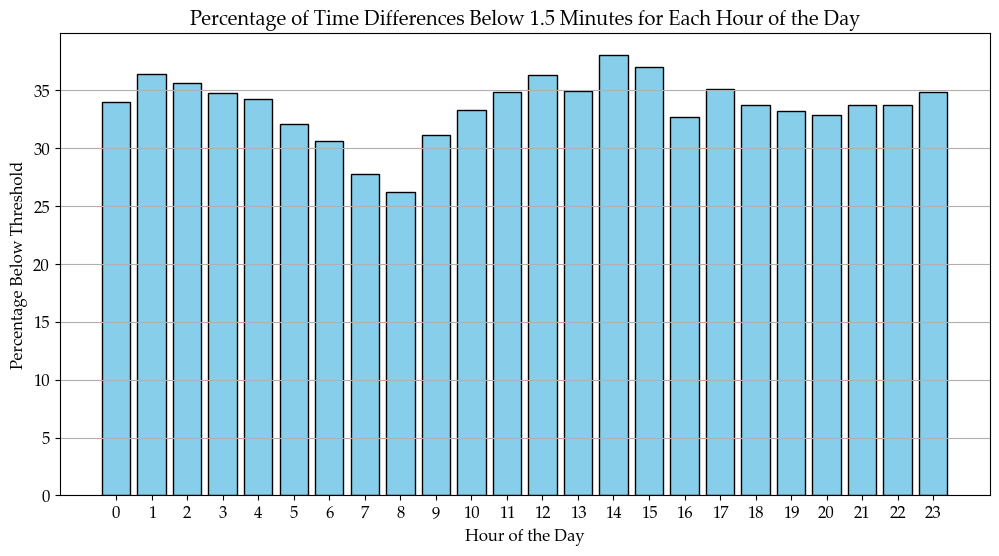

Suggested IQR upper bound for dropping rows: 1601.71 seconds
Suggested IQR lower bound for dropping rows: 9.94 seconds
Suggested Z-Score upper bound for dropping rows: 3682.53 seconds
Suggested Z-Score lower bound for dropping rows: 3.44 seconds


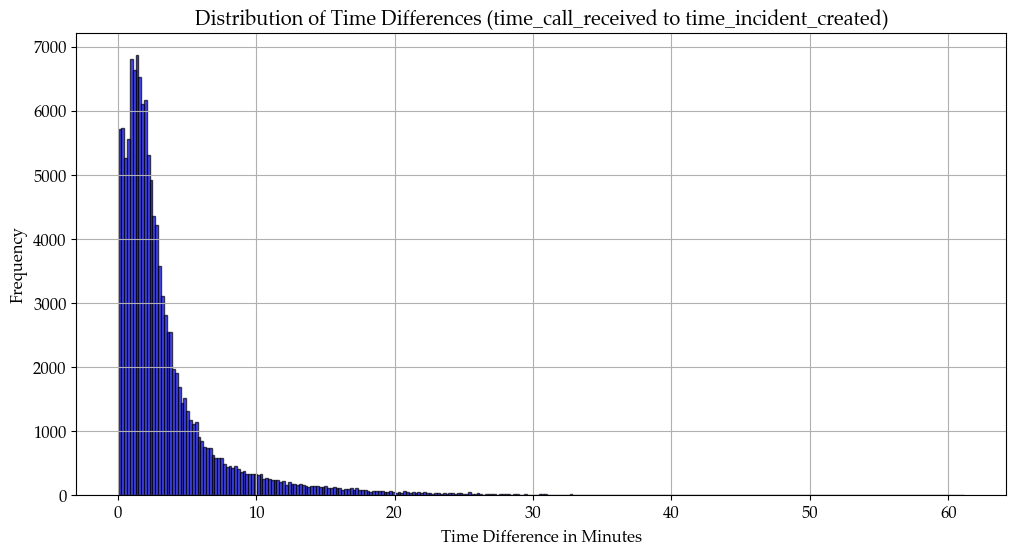

Mean time difference: 3.6792368936755215 minutes
Median time difference: 2.216666666666667 minutes
Standard deviation of time difference: 4.893734551370168 minutes
Maximum time difference: 61.15 minutes
Minimum time difference: 0.06666666666666667 minutes
Percentage of time differences below 1.5 minutes: 33.56%


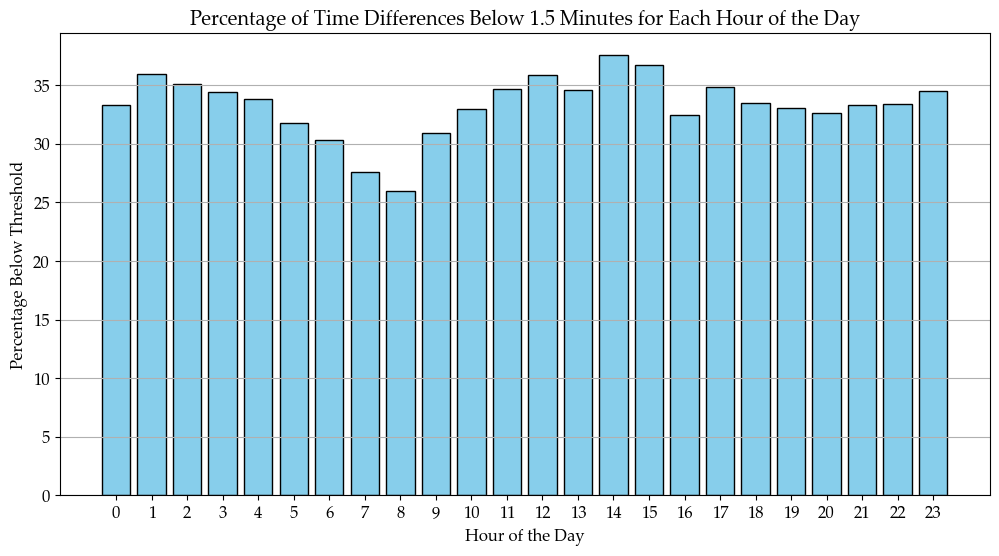



Dropped 1205 (0.41414058096534273%) rows


In [19]:
outlier_plotting(
    dataframe,
    triage_impression="H",
    column_start="time_call_received",
    column_end="time_incident_created",
    log_scale=False,
    z_score_threshold=3,
    bounds_to_use="z",
    percentage_threshold=1.5
)


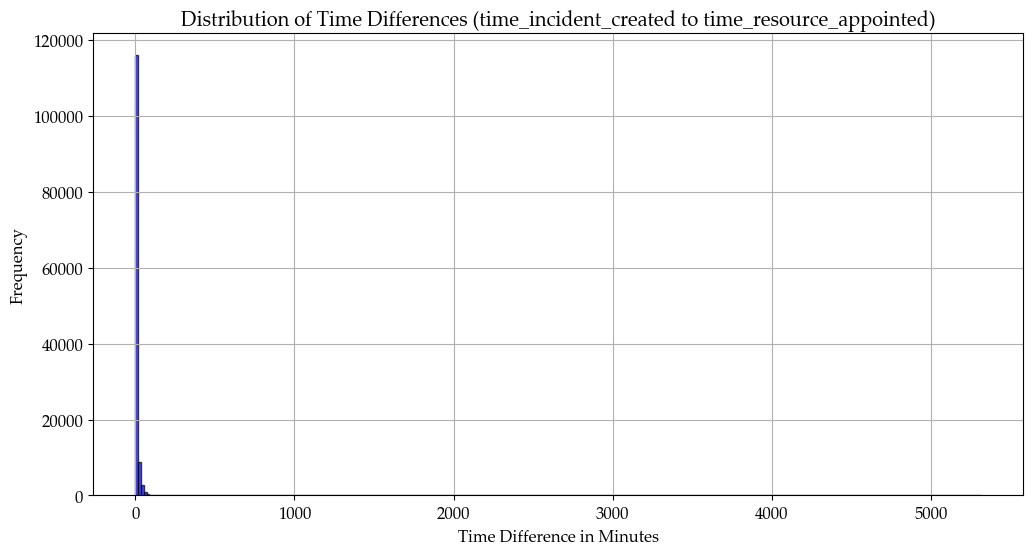

Mean time difference: 7.540981560874303 minutes
Median time difference: 2.533333333333333 minutes
Standard deviation of time difference: 26.182357591768145 minutes
Maximum time difference: 5310.916666666667 minutes
Minimum time difference: 0.0 minutes
Percentage of time differences below 0.5 minutes: 10.72%


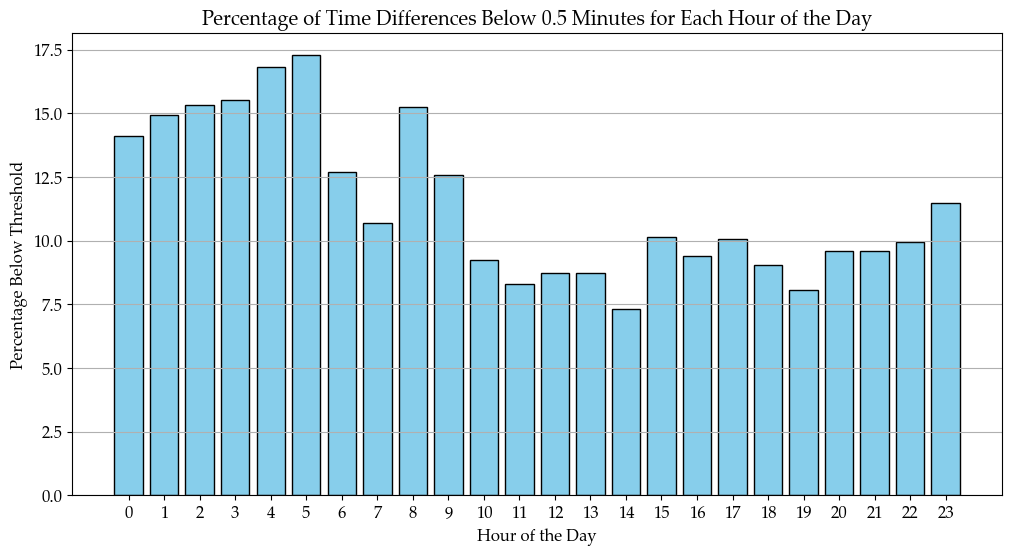

Suggested IQR upper bound for dropping rows: 7017.84 seconds
Suggested IQR lower bound for dropping rows: 2.82 seconds
Suggested Z-Score upper bound for dropping rows: 10855.78 seconds
Suggested Z-Score lower bound for dropping rows: 1.53 seconds


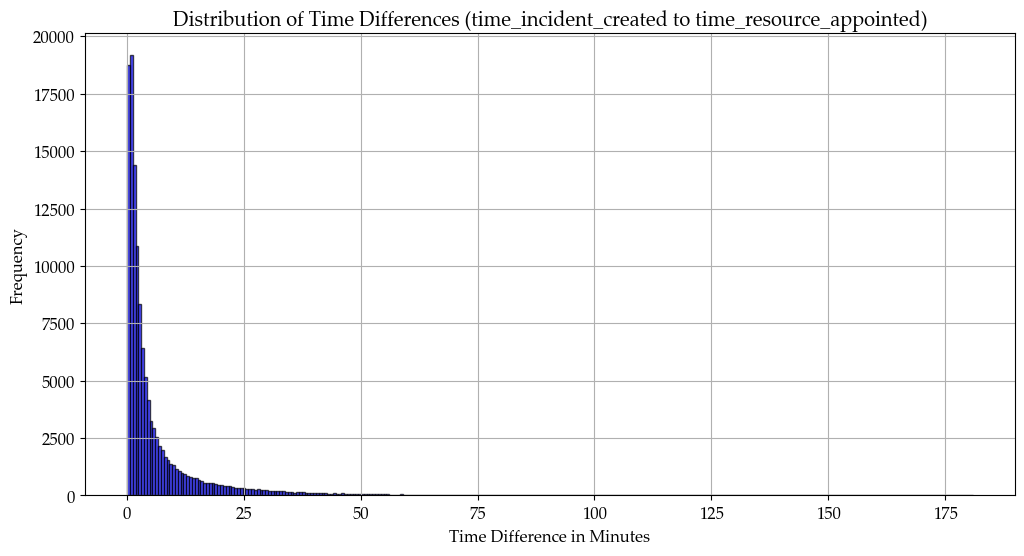

Mean time difference: 7.1122228489887585 minutes
Median time difference: 2.533333333333333 minutes
Standard deviation of time difference: 13.24700037180933 minutes
Maximum time difference: 180.85 minutes
Minimum time difference: 0.03333333333333333 minutes
Percentage of time differences below 0.5 minutes: 10.64%


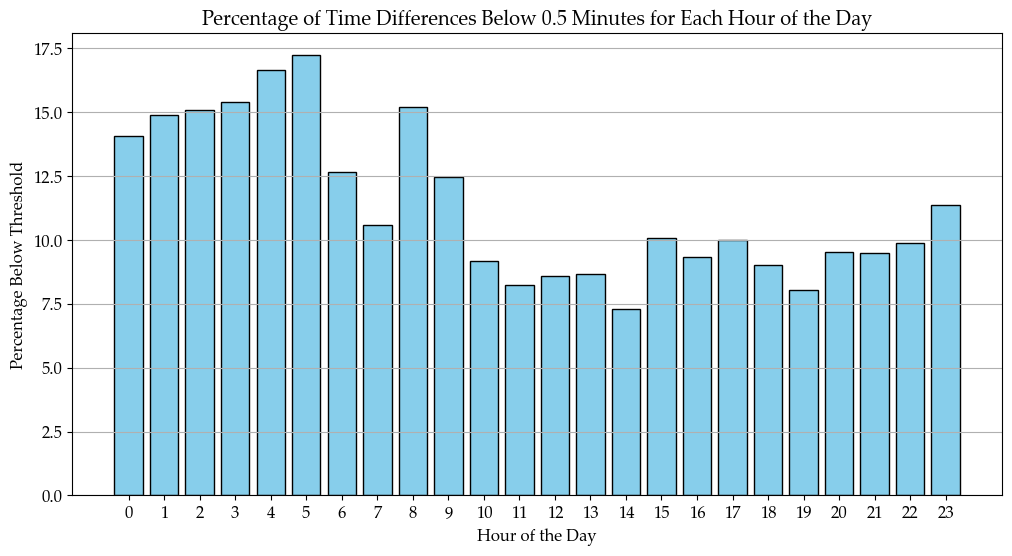



Dropped 276 (0.09485709572318225%) rows


In [20]:
outlier_plotting(
    dataframe,
    triage_impression="H",
    column_start="time_incident_created",
    column_end="time_resource_appointed",
    log_scale=False,
    z_score_threshold=3,
    bounds_to_use="z",
    percentage_threshold=0.5
)

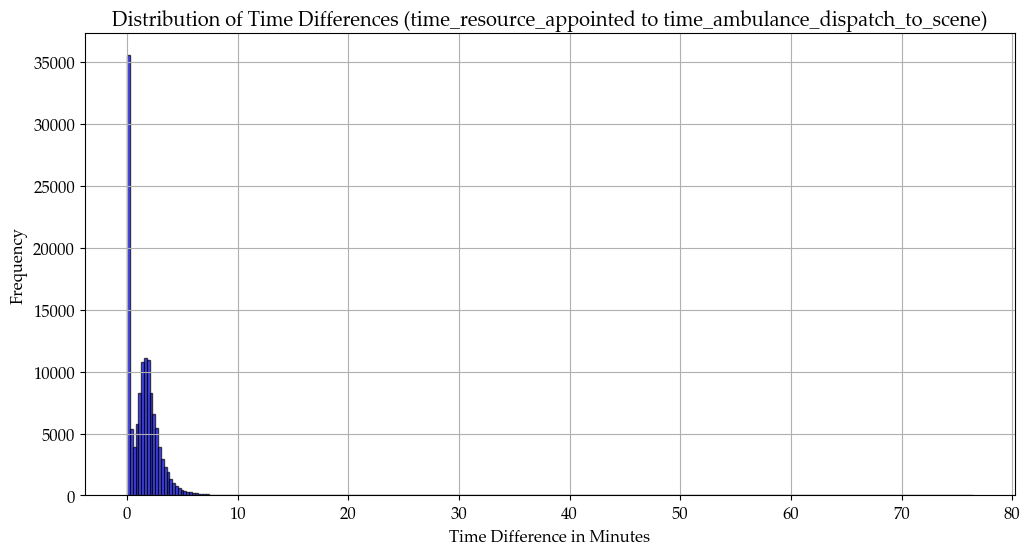

Mean time difference: 1.5485172105360558 minutes
Median time difference: 1.4166666666666667 minutes
Standard deviation of time difference: 1.691986165292268 minutes
Maximum time difference: 76.41666666666667 minutes
Minimum time difference: 0.0 minutes
Percentage of time differences below 1 minutes: 38.69%


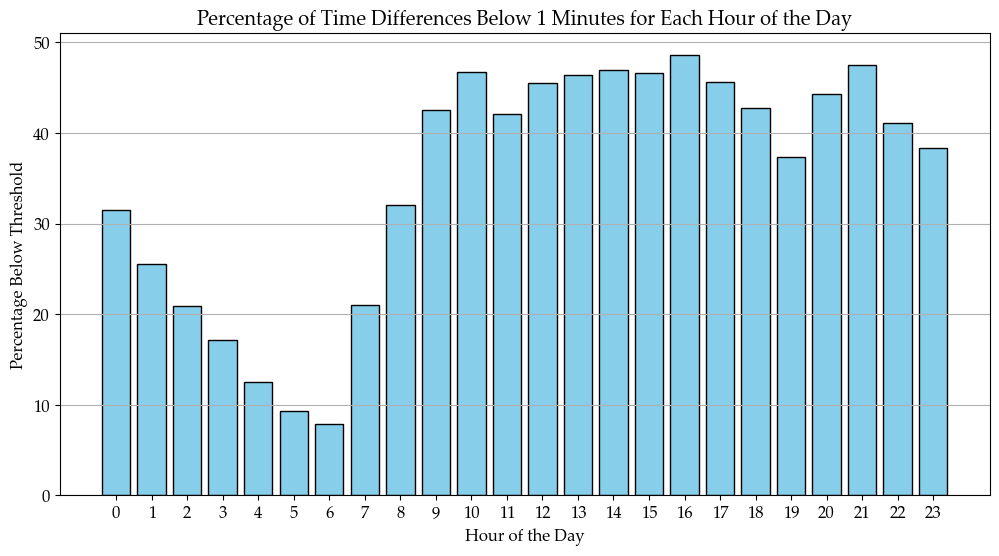

Suggested IQR upper bound for dropping rows: 4351.25 seconds
Suggested IQR lower bound for dropping rows: -0.6 seconds
Suggested Z-Score upper bound for dropping rows: 3066.55 seconds
Suggested Z-Score lower bound for dropping rows: -0.23 seconds


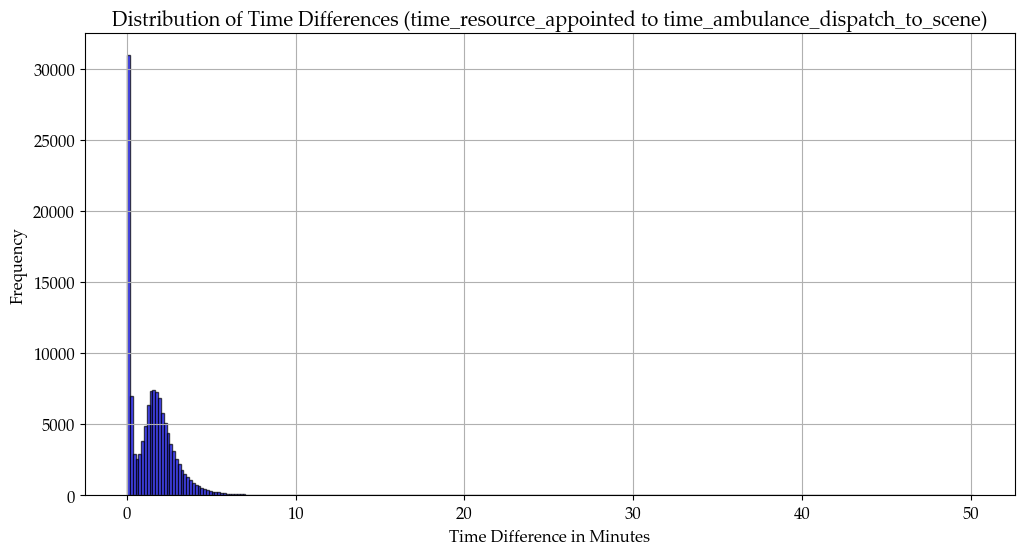

Mean time difference: 1.5475087262053469 minutes
Median time difference: 1.4166666666666667 minutes
Standard deviation of time difference: 1.6719830511912053 minutes
Maximum time difference: 50.11666666666667 minutes
Minimum time difference: 0.0 minutes
Percentage of time differences below 1 minutes: 38.70%


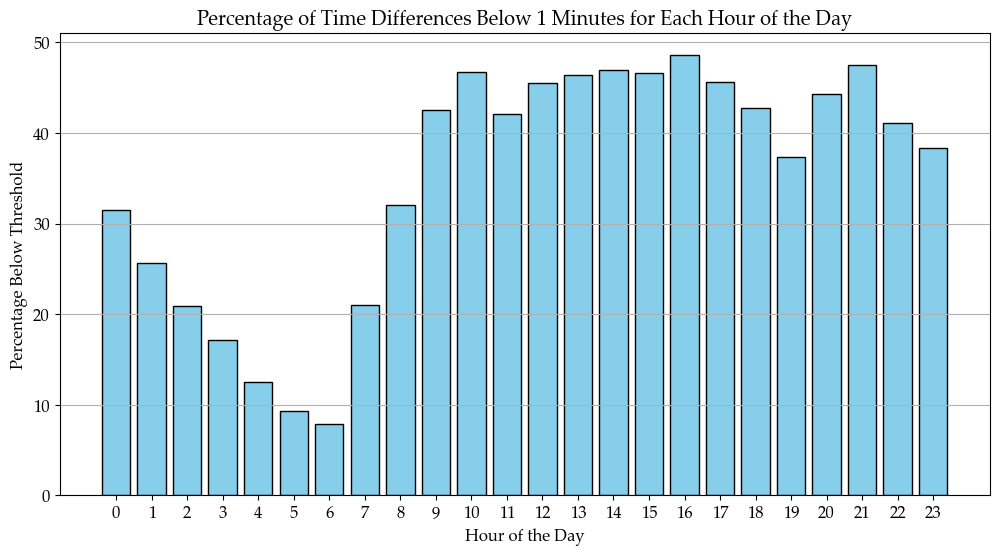



Dropped 2 (0.0006873702588636395%) rows


In [21]:
outlier_plotting(
    dataframe,
    triage_impression="H",
    column_start="time_resource_appointed",
    column_end="time_ambulance_dispatch_to_scene",
    log_scale=False,
    z_score_threshold=3,
    bounds_to_use="z",
    percentage_threshold=1
)

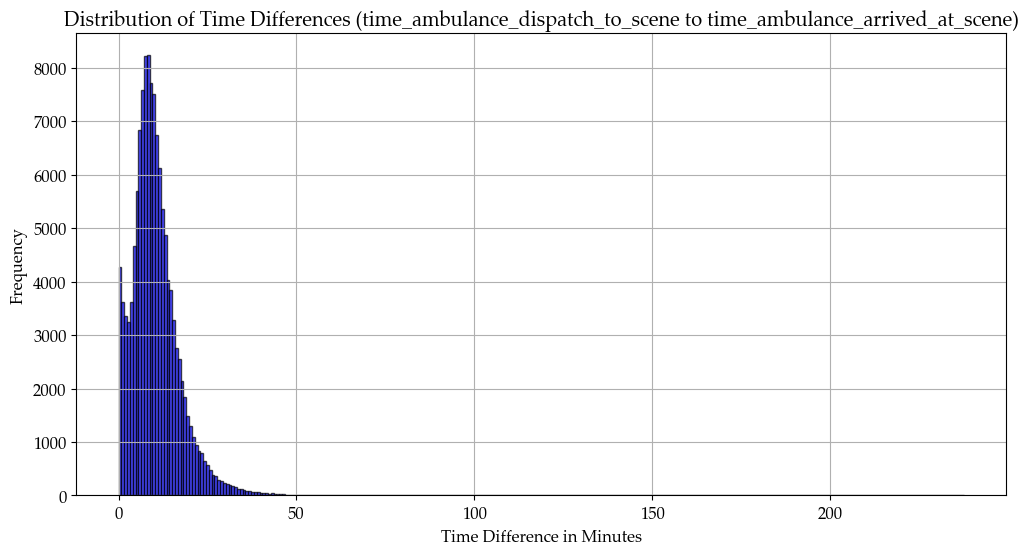

Mean time difference: 10.344781064297905 minutes
Median time difference: 9.283333333333333 minutes
Standard deviation of time difference: 6.834454998020767 minutes
Maximum time difference: 237.75 minutes
Minimum time difference: 0.0 minutes
Percentage of time differences below 10 minutes: 55.35%


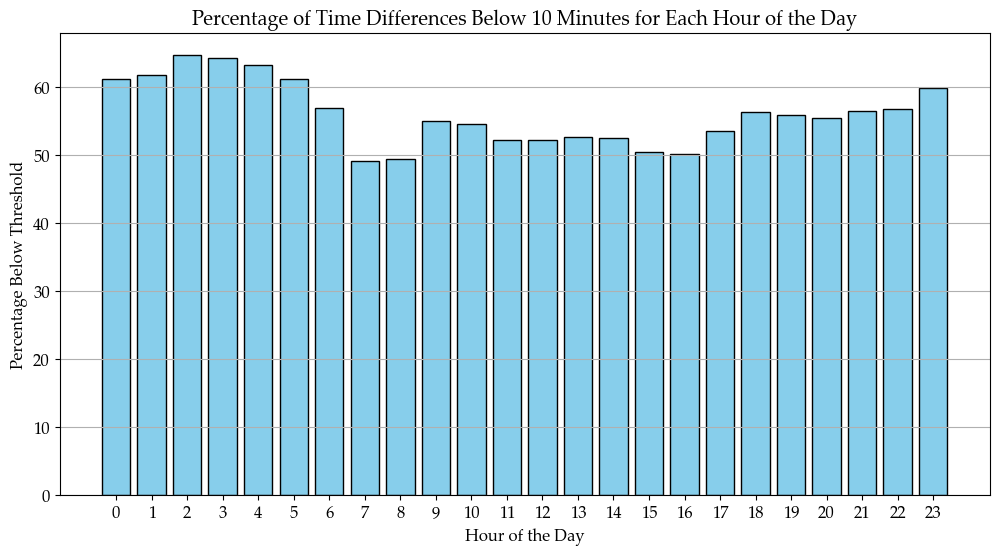

Suggested IQR upper bound for dropping rows: 2676.78 seconds
Suggested IQR lower bound for dropping rows: 107.96 seconds
Suggested Z-Score upper bound for dropping rows: 10065.05 seconds
Suggested Z-Score lower bound for dropping rows: 19.92 seconds


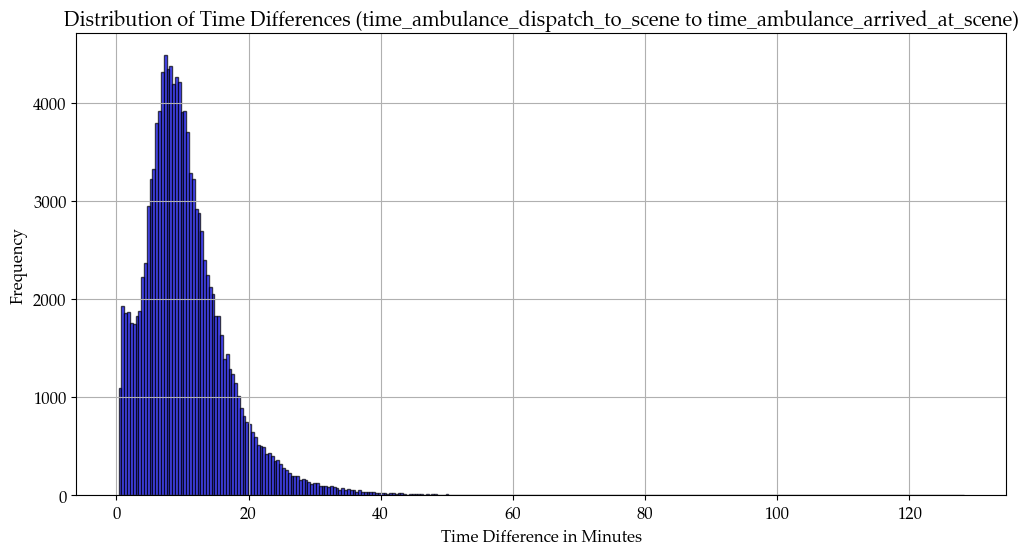

Mean time difference: 10.59127436656795 minutes
Median time difference: 9.45 minutes
Standard deviation of time difference: 6.694849083166512 minutes
Maximum time difference: 128.33333333333334 minutes
Minimum time difference: 0.3333333333333333 minutes
Percentage of time differences below 10 minutes: 54.27%


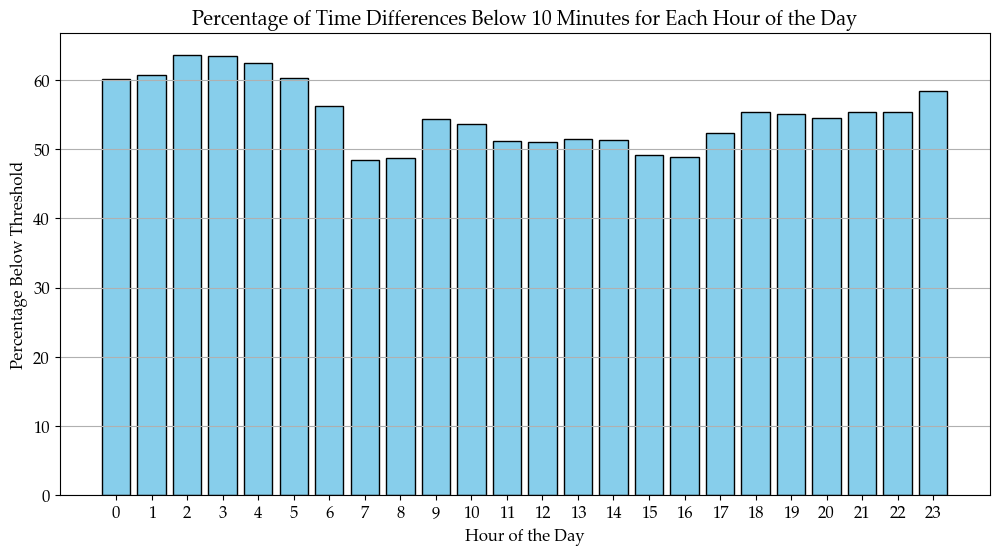



Dropped 3063 (1.0527075514496638%) rows


In [24]:
outlier_plotting(
    dataframe,
    triage_impression="H",
    column_start="time_ambulance_dispatch_to_scene",
    column_end="time_ambulance_arrived_at_scene",
    log_scale=False,
    z_score_threshold=3,
    bounds_to_use="z",
    percentage_threshold=10
)

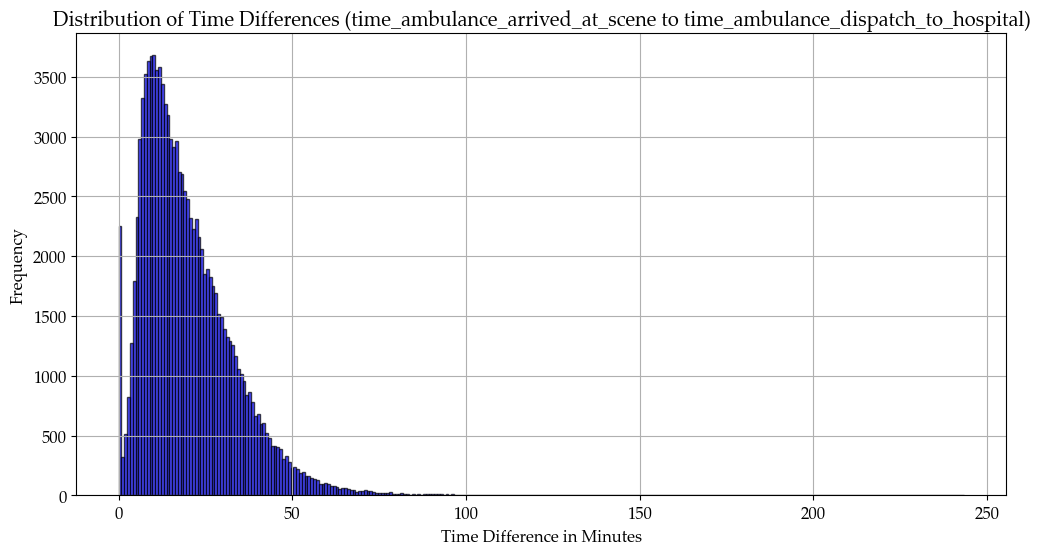

Mean time difference: 19.926858767840756 minutes
Median time difference: 16.916666666666668 minutes
Standard deviation of time difference: 13.771635927978844 minutes
Maximum time difference: 243.45 minutes
Minimum time difference: 0.0 minutes
Percentage of time differences below 60 minutes: 98.71%


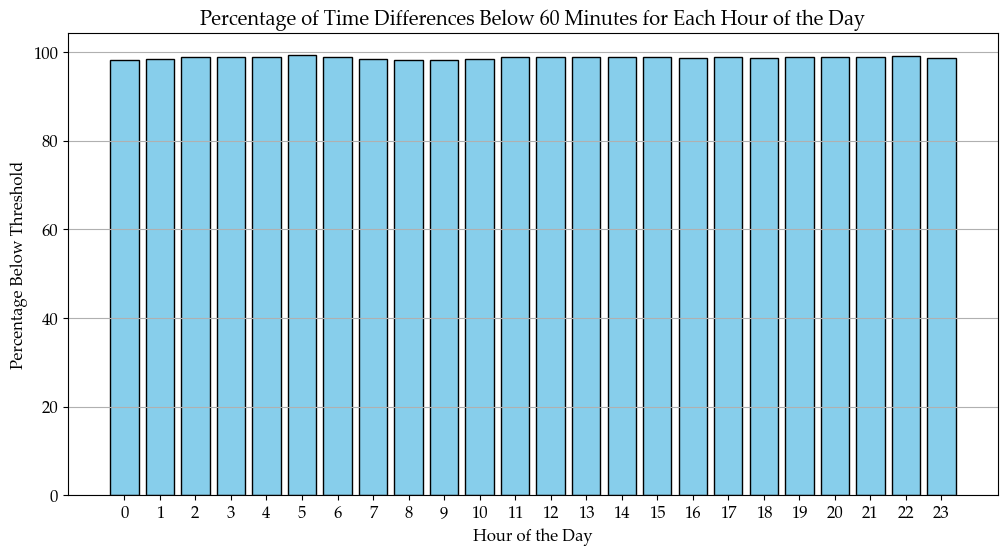

Suggested IQR upper bound for dropping rows: 7066.78 seconds
Suggested IQR lower bound for dropping rows: 136.7 seconds
Suggested Z-Score upper bound for dropping rows: 18983.64 seconds
Suggested Z-Score lower bound for dropping rows: 40.17 seconds


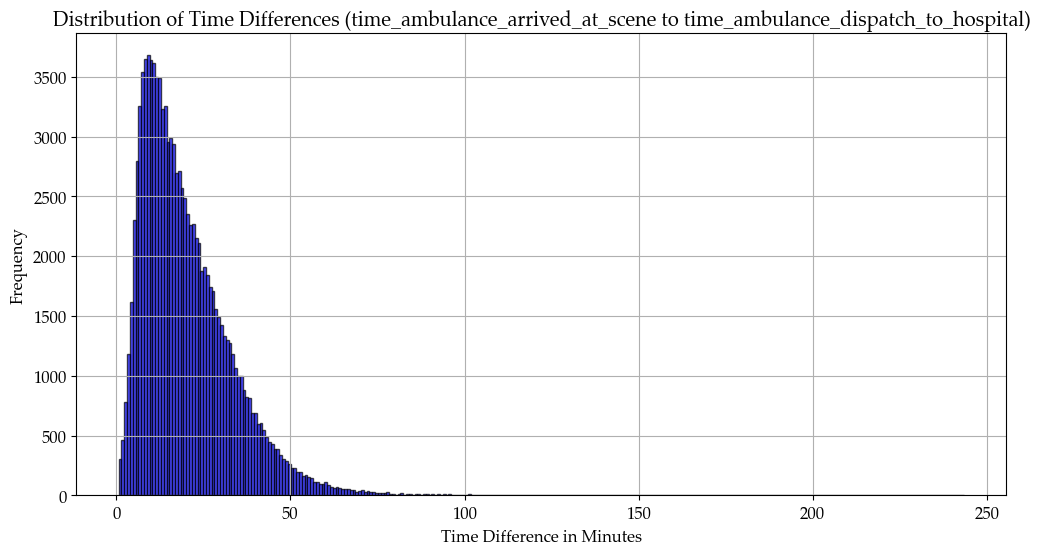

Mean time difference: 20.329139619084344 minutes
Median time difference: 17.233333333333334 minutes
Standard deviation of time difference: 13.614826792515817 minutes
Maximum time difference: 243.45 minutes
Minimum time difference: 0.6833333333333333 minutes
Percentage of time differences below 60 minutes: 98.68%


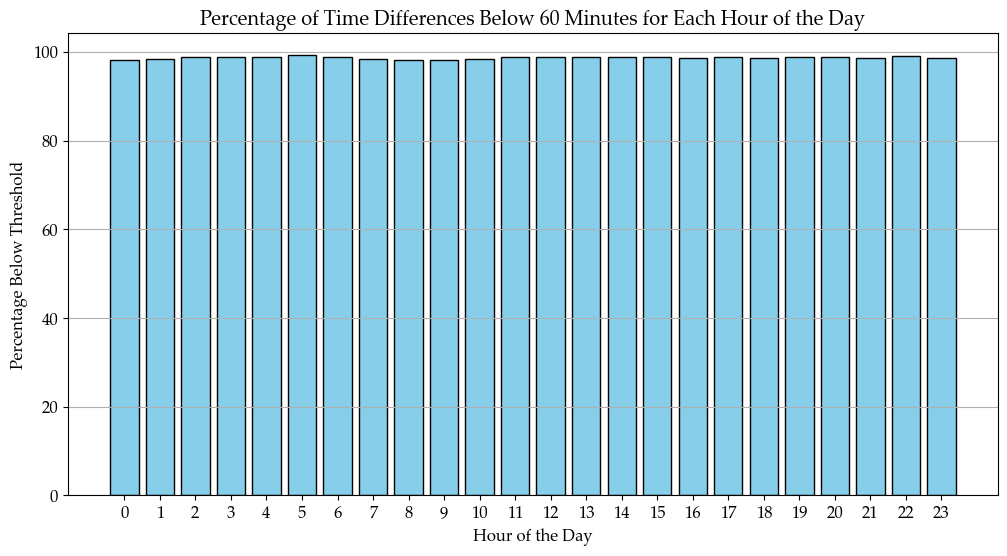



Dropped 2209 (0.7592004509148897%) rows


In [25]:
outlier_plotting(
    dataframe,
    triage_impression="H",
    column_start="time_ambulance_arrived_at_scene",
    column_end="time_ambulance_dispatch_to_hospital",
    log_scale=False,
    z_score_threshold=3,
    bounds_to_use="z",
    percentage_threshold=60
)

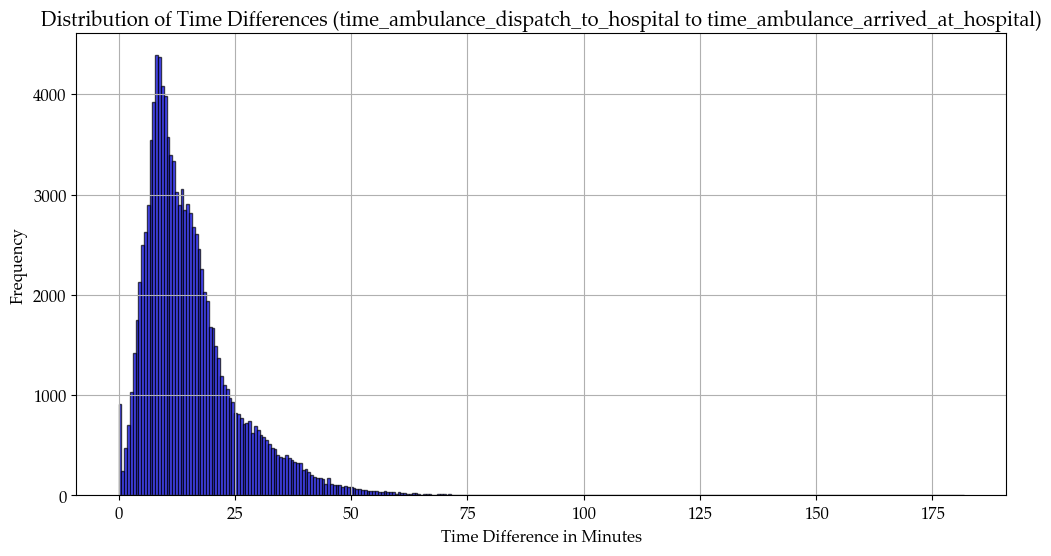

Mean time difference: 15.485687652610043 minutes
Median time difference: 12.983333333333333 minutes
Standard deviation of time difference: 10.36080673581909 minutes
Maximum time difference: 181.81666666666666 minutes
Minimum time difference: 0.0 minutes
Percentage of time differences below 30 minutes: 90.44%


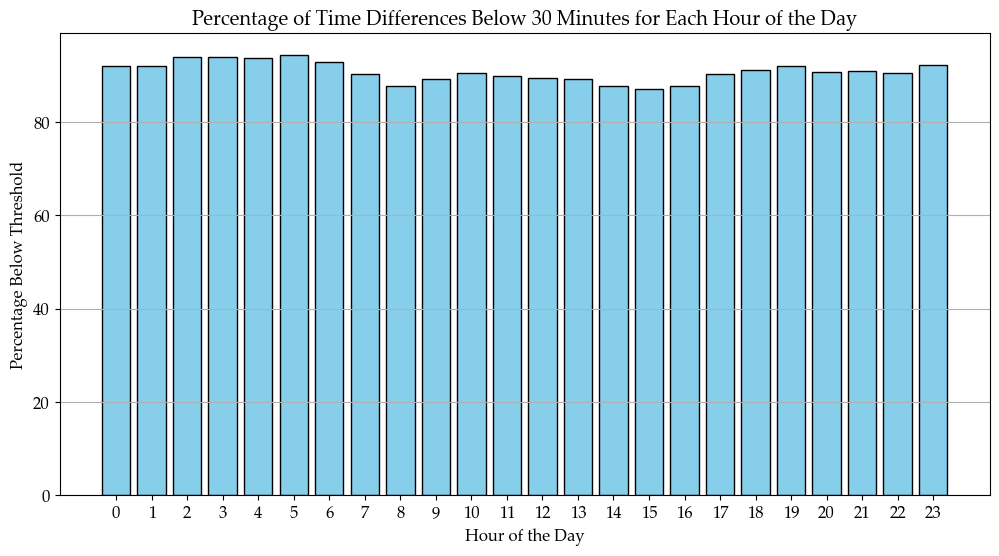

Suggested IQR upper bound for dropping rows: 4190.53 seconds
Suggested IQR lower bound for dropping rows: 140.41 seconds
Suggested Z-Score upper bound for dropping rows: 8122.3 seconds
Suggested Z-Score lower bound for dropping rows: 65.58 seconds


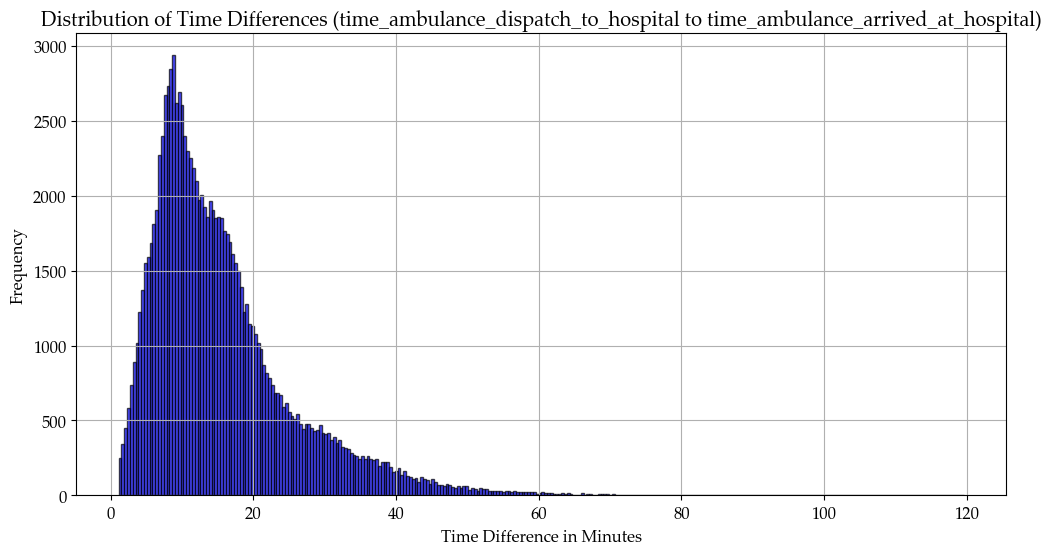

Mean time difference: 15.636499654583137 minutes
Median time difference: 13.083333333333334 minutes
Standard deviation of time difference: 10.277904643217504 minutes
Maximum time difference: 119.65 minutes
Minimum time difference: 1.1 minutes
Percentage of time differences below 30 minutes: 90.35%


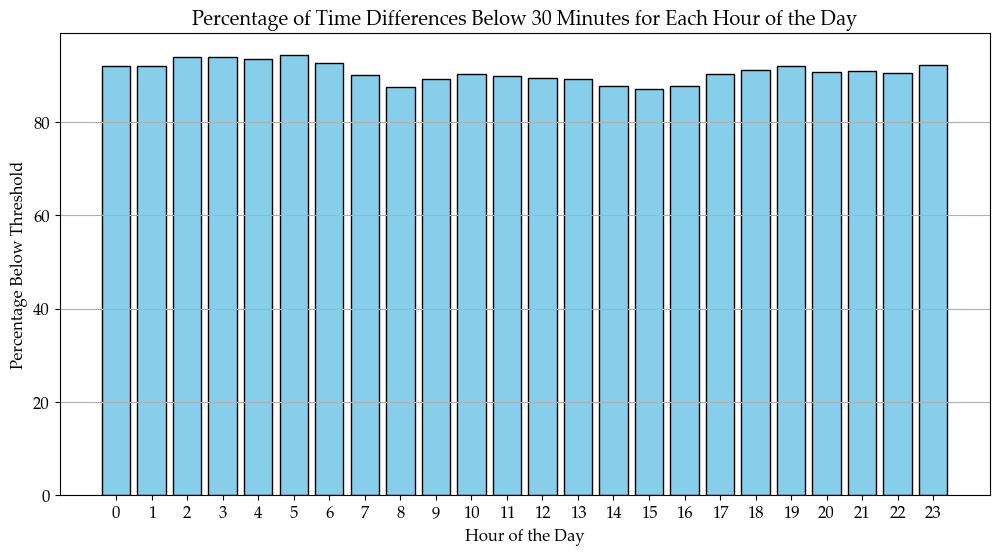



Dropped 1110 (0.3814904936693199%) rows


In [26]:
outlier_plotting(
    dataframe,
    triage_impression="H",
    column_start="time_ambulance_dispatch_to_hospital",
    column_end="time_ambulance_arrived_at_hospital",
    log_scale=False,
    z_score_threshold=3,
    bounds_to_use="z",
    percentage_threshold=30
)

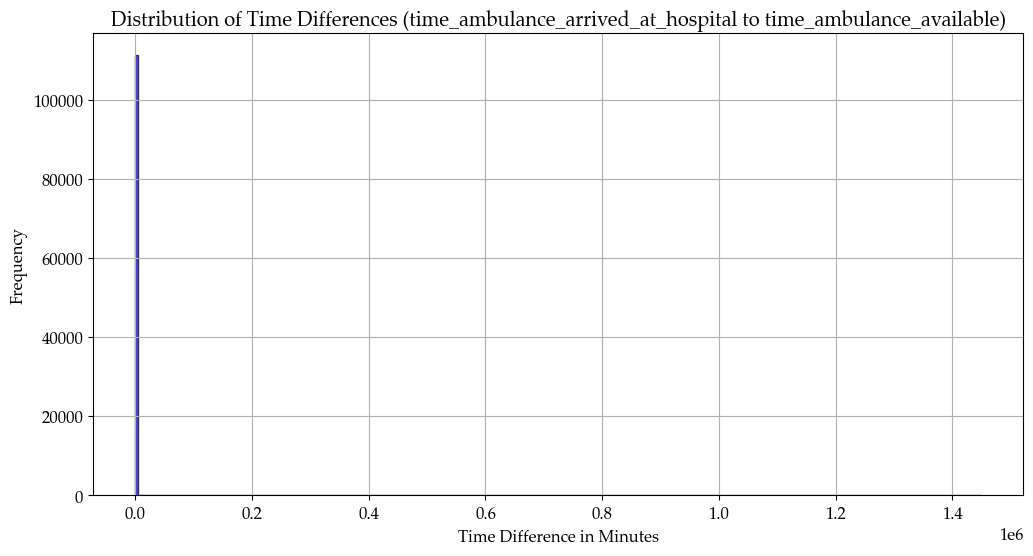

Mean time difference: 29.86950348865811 minutes
Median time difference: 13.883333333333333 minutes
Standard deviation of time difference: 4345.833606573013 minutes
Maximum time difference: 1448664.0666666667 minutes
Minimum time difference: 0.0 minutes
Percentage of time differences below 90 minutes: 99.71%


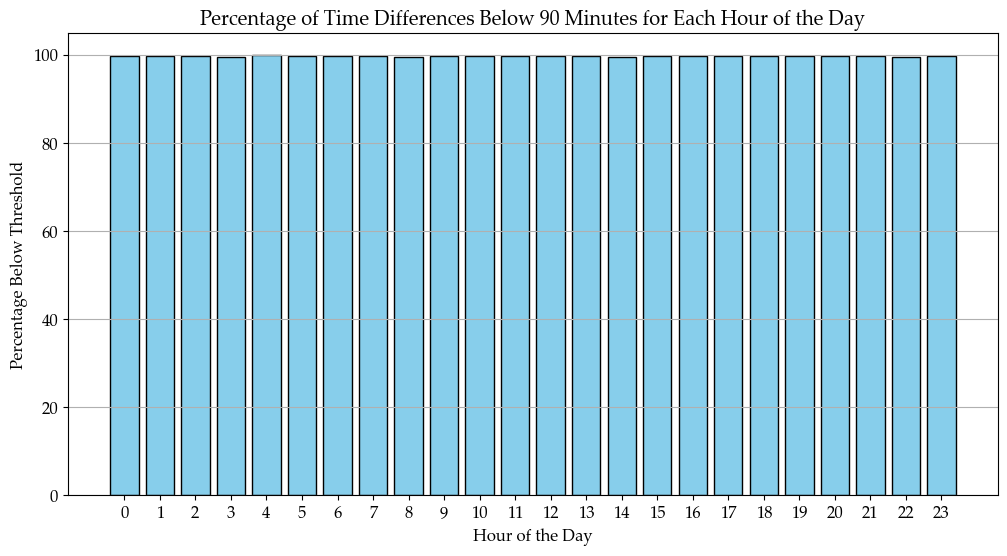

Suggested IQR upper bound for dropping rows: 3322.42 seconds
Suggested IQR lower bound for dropping rows: 208.13 seconds
Suggested Z-Score upper bound for dropping rows: 7296.81 seconds
Suggested Z-Score lower bound for dropping rows: 87.49 seconds


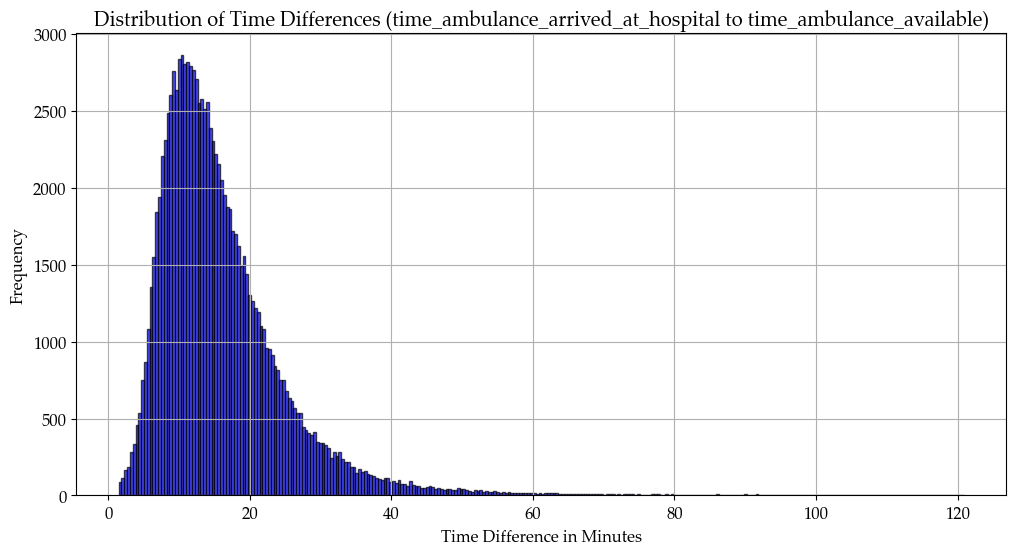

Mean time difference: 16.13657673347071 minutes
Median time difference: 13.983333333333333 minutes
Standard deviation of time difference: 9.717051520916918 minutes
Maximum time difference: 120.93333333333334 minutes
Minimum time difference: 1.4666666666666666 minutes
Percentage of time differences below 90 minutes: 99.88%


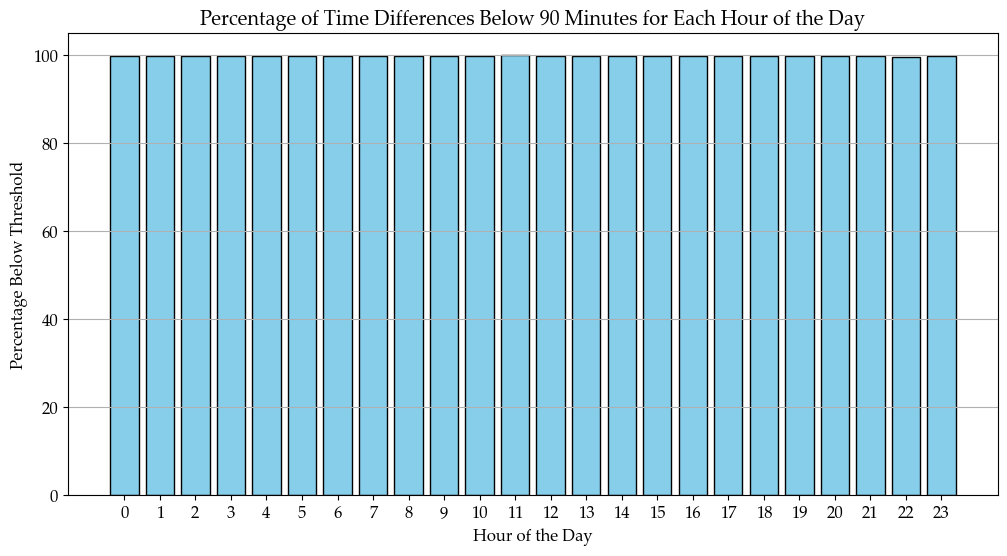



Dropped 1448 (0.497656067417275%) rows


In [28]:
outlier_plotting(
    dataframe,
    triage_impression="H",
    column_start="time_ambulance_arrived_at_hospital",
    column_end="time_ambulance_available",
    log_scale=False,
    z_score_threshold=3,
    bounds_to_use="z",
    percentage_threshold=90
)

129688
18566


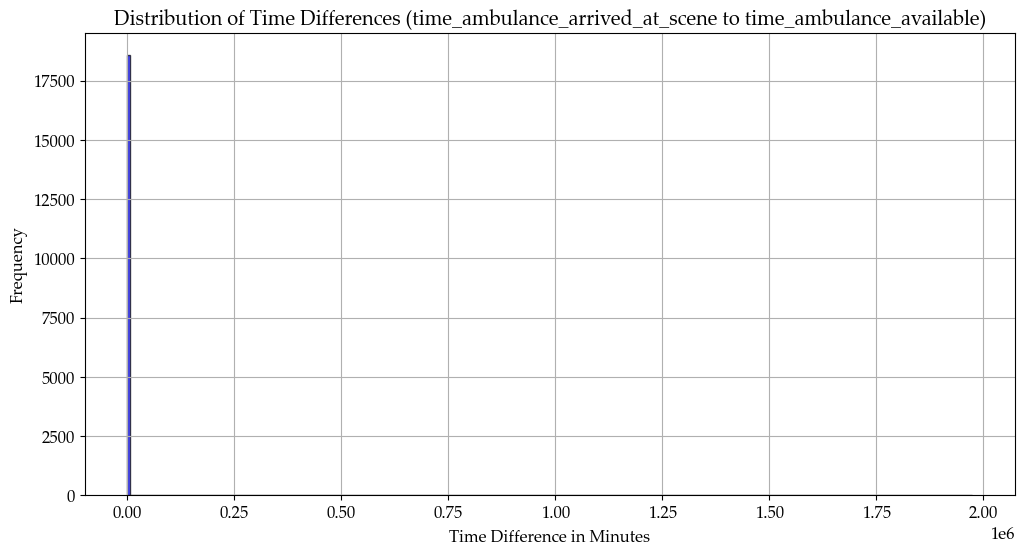

Mean time difference: 140.0351062874789 minutes
Median time difference: 30.5 minutes
Standard deviation of time difference: 14489.257782151015 minutes
Maximum time difference: 1974294.1666666667 minutes
Minimum time difference: -0.31666666666666665 minutes
Percentage of time differences below 30 minutes: 48.95%


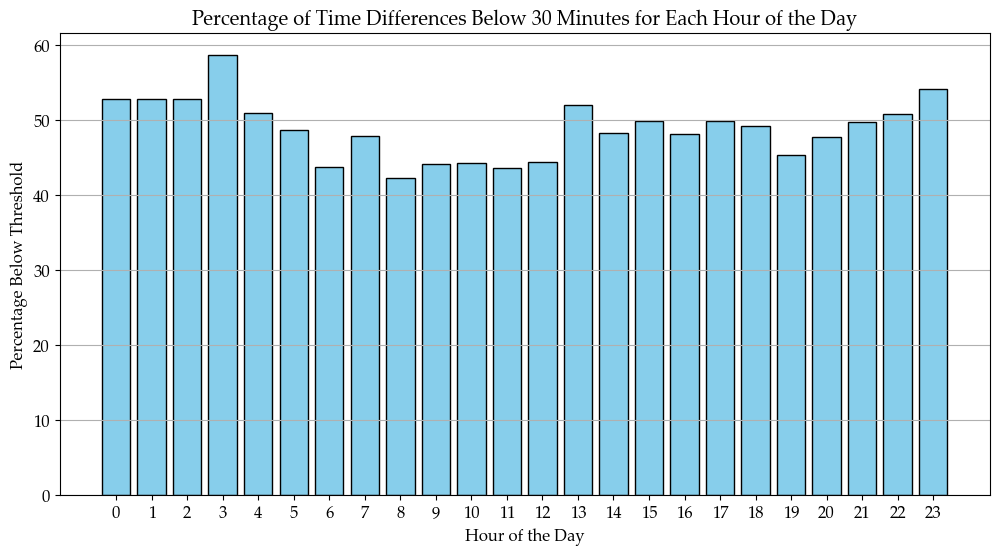

c:\Programming\GitHub\Data-Processing\.venv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Suggested IQR upper bound for dropping rows: 9473.04 seconds
Suggested IQR lower bound for dropping rows: 313.16 seconds
Suggested Z-Score upper bound for dropping rows: 24566.14 seconds
Suggested Z-Score lower bound for dropping rows: 93.15 seconds
129364
18242


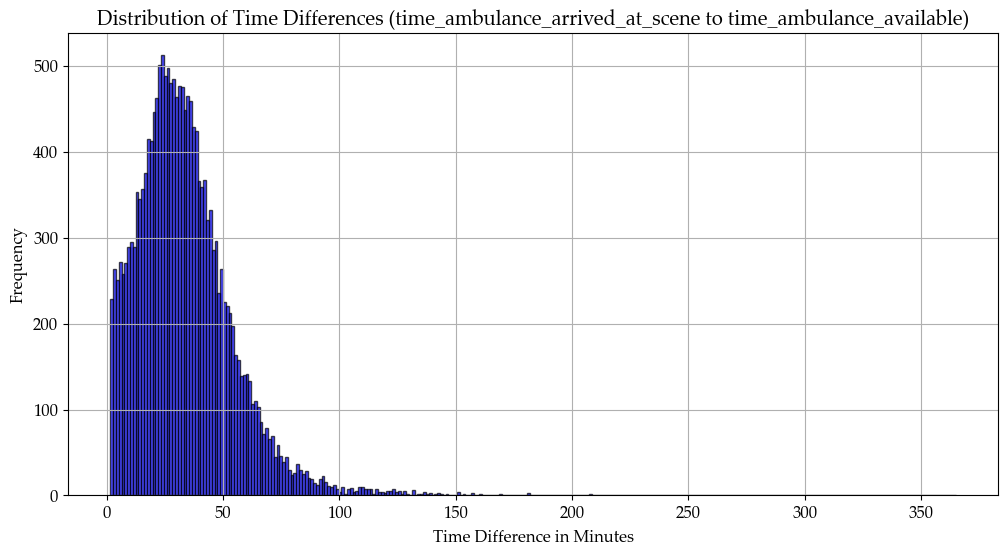

Mean time difference: 33.85760150568286 minutes
Median time difference: 30.933333333333334 minutes
Standard deviation of time difference: 21.731315495766683 minutes
Maximum time difference: 364.8666666666667 minutes
Minimum time difference: 1.5666666666666667 minutes
Percentage of time differences below 30 minutes: 48.10%


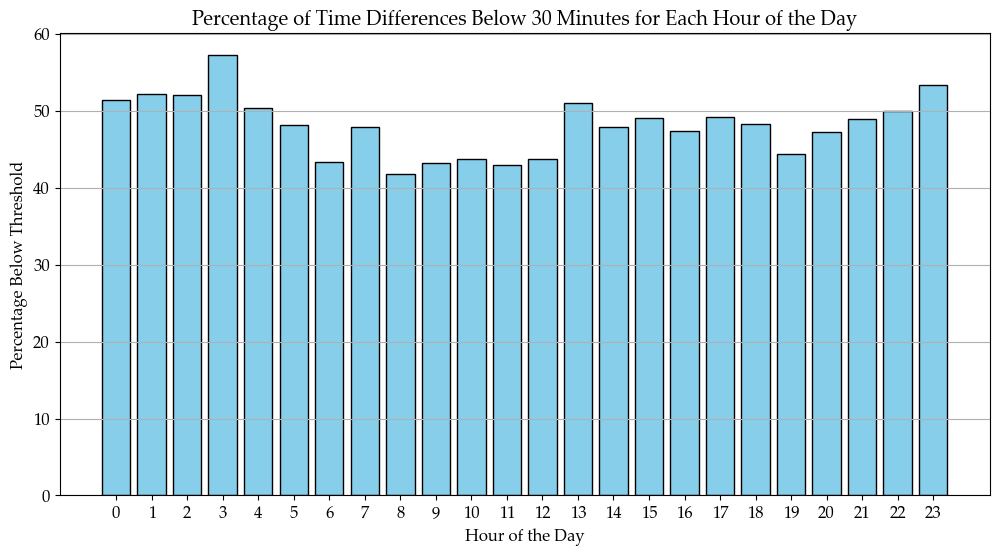



Dropped 324 (0.11135398193590959%) rows


In [29]:
outlier_plotting(
    dataframe,
    triage_impression="H",
    column_start="time_ambulance_arrived_at_scene",
    column_end="time_ambulance_available",
    cancelled=True,
    log_scale=False,
    z_score_threshold=3,
    bounds_to_use="z",
    percentage_threshold=30
)

# V1 Incidents

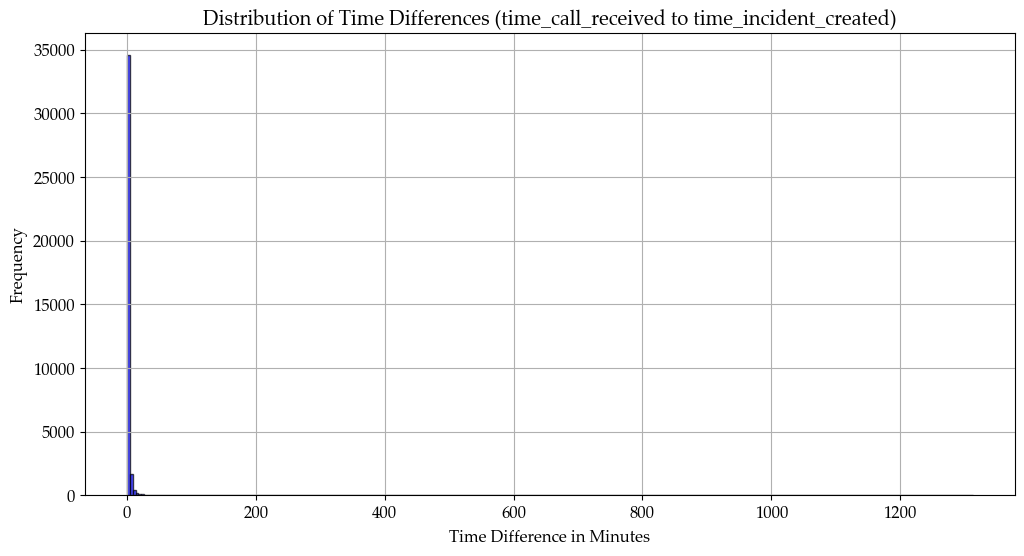

Mean time difference: 2.269104930588437 minutes
Median time difference: 0.95 minutes
Standard deviation of time difference: 12.804522898051559 minutes
Maximum time difference: 1312.4666666666667 minutes
Minimum time difference: 0.0 minutes
Percentage of time differences below 1.5 minutes: 64.38%


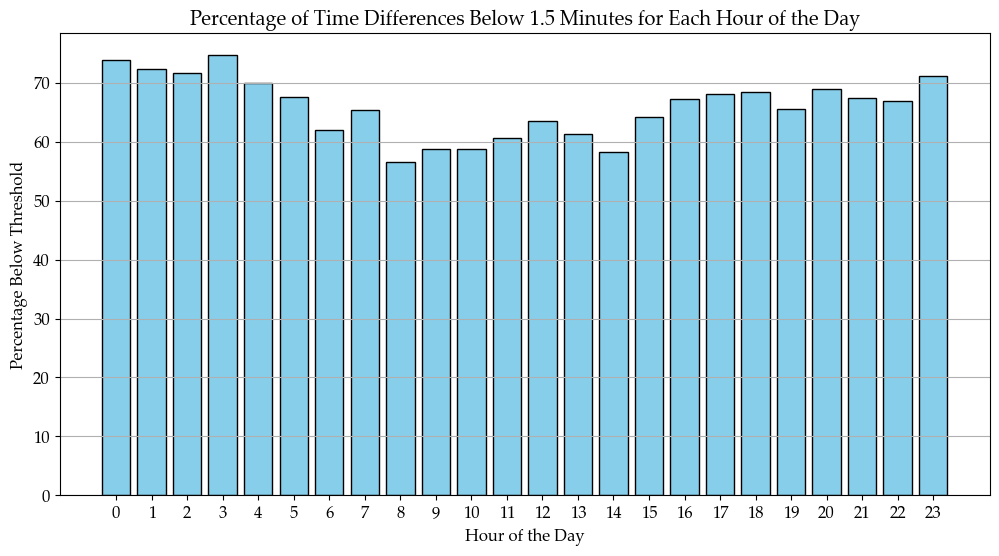

Suggested IQR upper bound for dropping rows: 1508.99 seconds
Suggested IQR lower bound for dropping rows: 1.27 seconds
Suggested Z-Score upper bound for dropping rows: 2018.32 seconds
Suggested Z-Score lower bound for dropping rows: 0.61 seconds


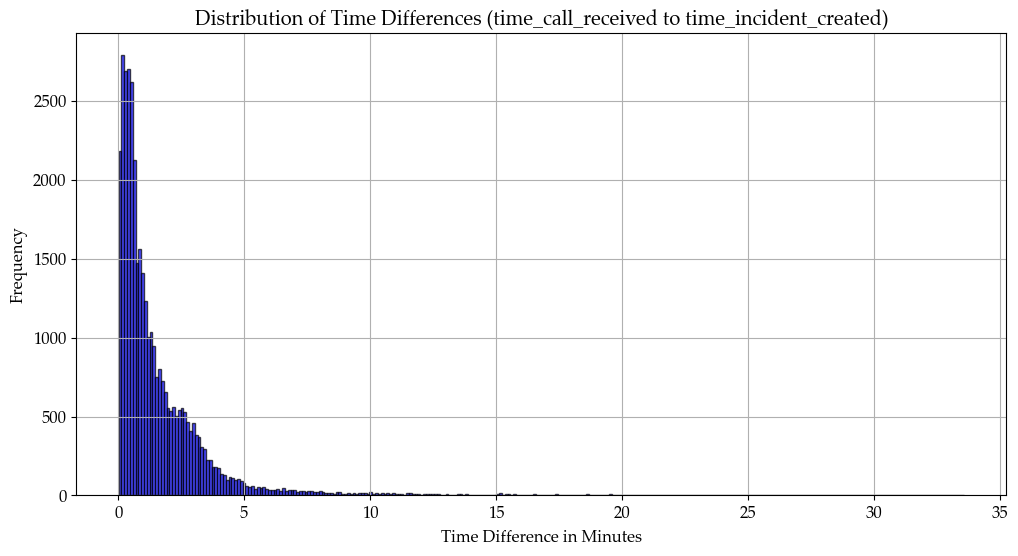

Mean time difference: 1.760663245865098 minutes
Median time difference: 0.95 minutes
Standard deviation of time difference: 2.7404040285678284 minutes
Maximum time difference: 33.583333333333336 minutes
Minimum time difference: 0.016666666666666666 minutes
Percentage of time differences below 1.5 minutes: 64.67%


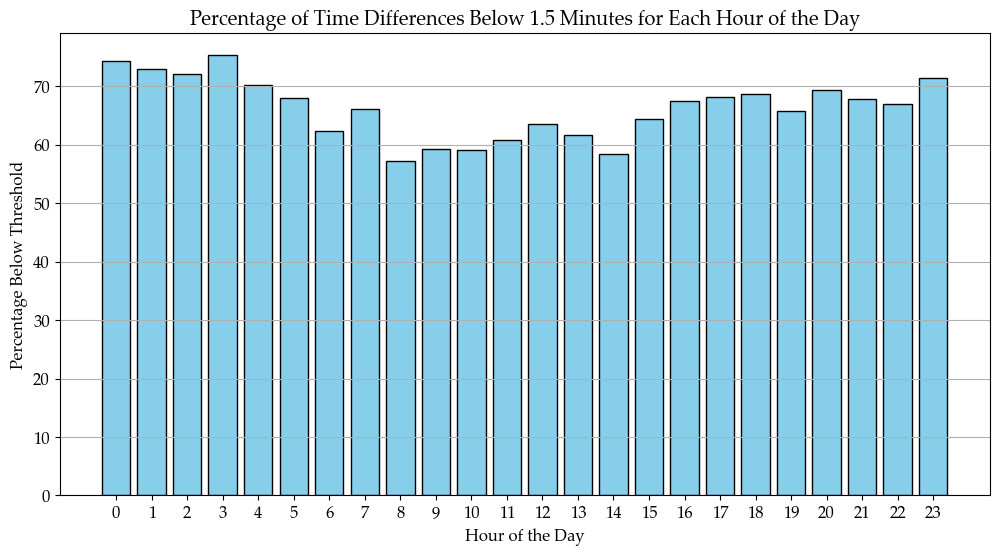



Dropped 175 (0.060144897650568456%) rows


In [30]:
outlier_plotting(
    dataframe,
    triage_impression="V1",
    column_start="time_call_received",
    column_end="time_incident_created",
    log_scale=False,
    z_score_threshold=3,
    bounds_to_use="z",
    percentage_threshold=1.5
)


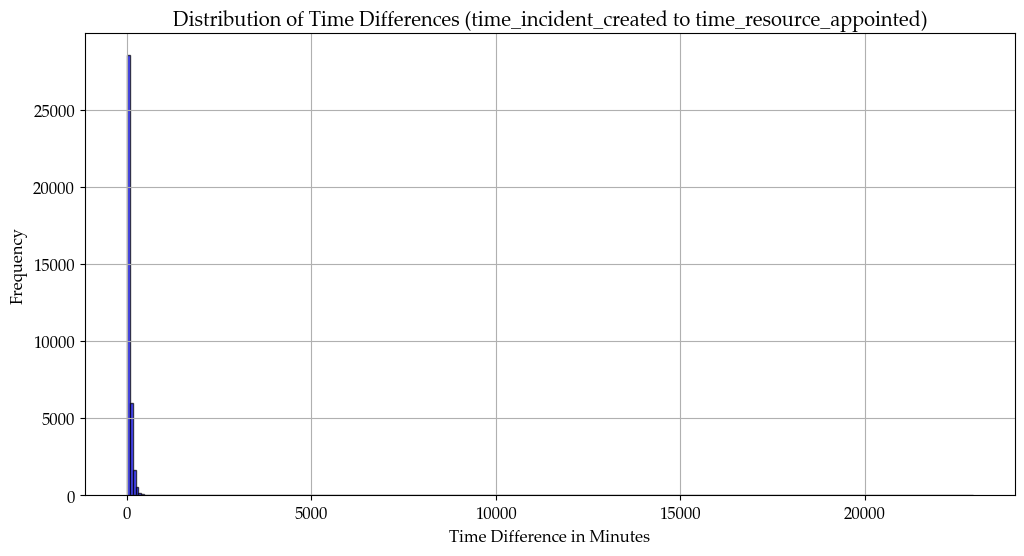

Mean time difference: 65.85739628845347 minutes
Median time difference: 29.866666666666667 minutes
Standard deviation of time difference: 305.9770216143643 minutes
Maximum time difference: 22922.916666666668 minutes
Minimum time difference: 0.0 minutes
Percentage of time differences below 0.5 minutes: 2.81%


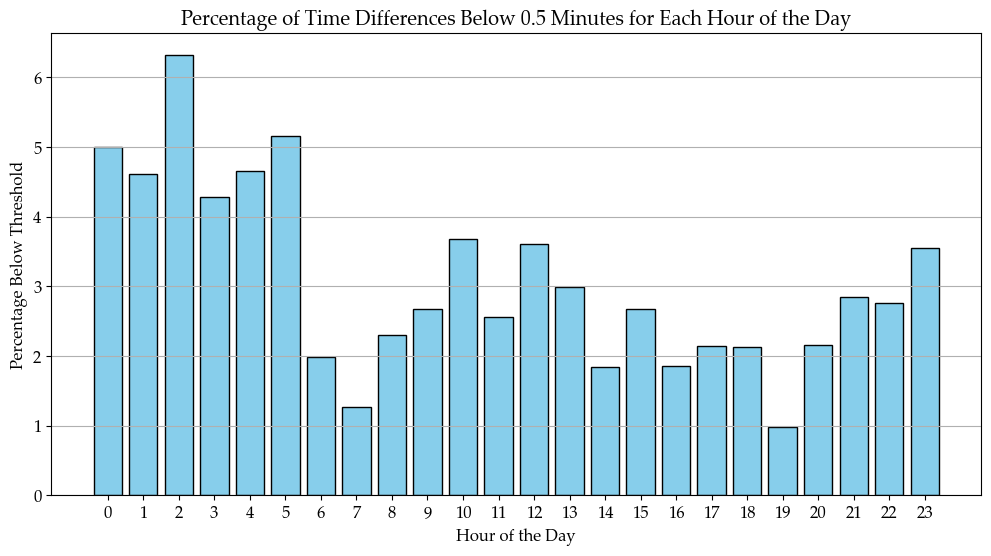

Suggested IQR upper bound for dropping rows: 115490.54 seconds
Suggested IQR lower bound for dropping rows: 17.48 seconds
Suggested Z-Score upper bound for dropping rows: 193017.8 seconds
Suggested Z-Score lower bound for dropping rows: 8.07 seconds


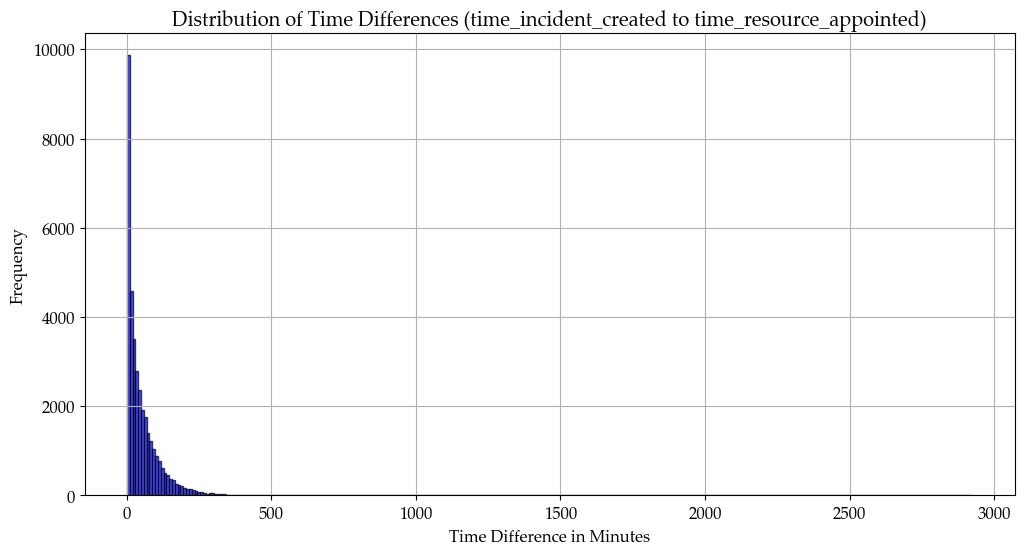

Mean time difference: 59.103019116378334 minutes
Median time difference: 30.716666666666665 minutes
Standard deviation of time difference: 118.11840583796024 minutes
Maximum time difference: 2924.85 minutes
Minimum time difference: 0.15 minutes
Percentage of time differences below 0.5 minutes: 1.32%


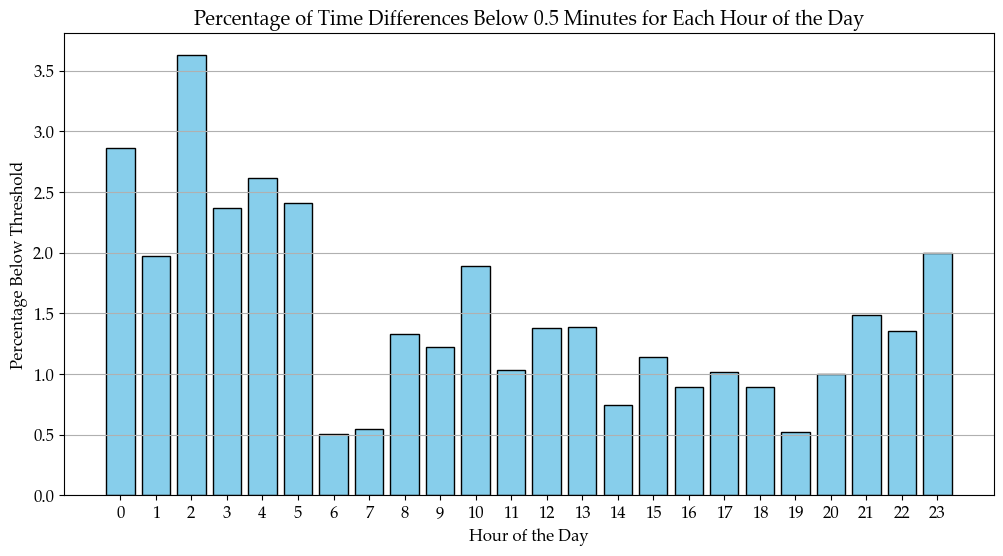



Dropped 602 (0.20689844791795547%) rows


In [31]:
outlier_plotting(
    dataframe,
    triage_impression="V1",
    column_start="time_incident_created",
    column_end="time_resource_appointed",
    log_scale=False,
    z_score_threshold=3,
    bounds_to_use="z",
    percentage_threshold=0.5
)


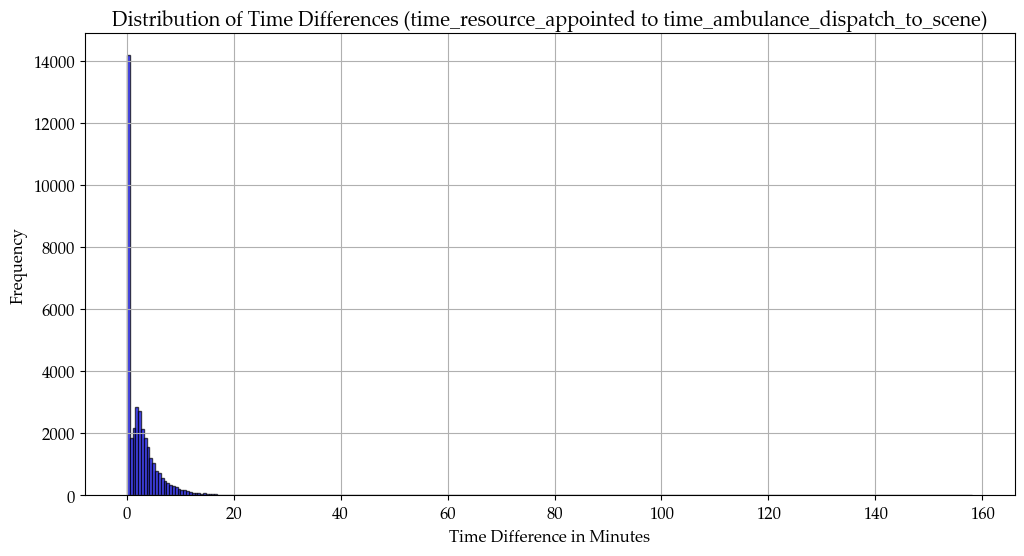

Mean time difference: 2.9085042127929523 minutes
Median time difference: 1.6833333333333333 minutes
Standard deviation of time difference: 5.212701756953559 minutes
Maximum time difference: 158.16666666666666 minutes
Minimum time difference: 0.0 minutes
Percentage of time differences below 1 minutes: 42.50%


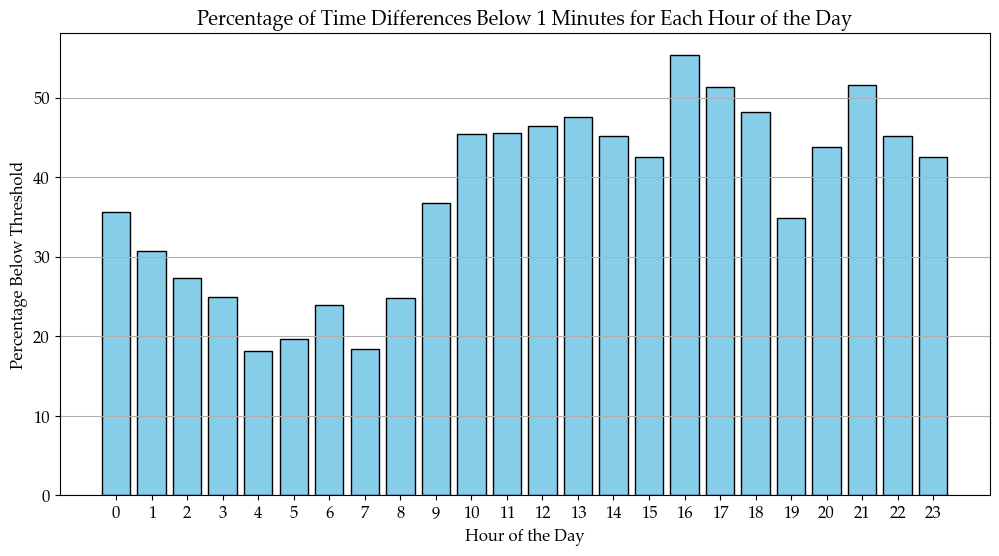

Suggested IQR upper bound for dropping rows: 28753.17 seconds
Suggested IQR lower bound for dropping rows: -0.93 seconds
Suggested Z-Score upper bound for dropping rows: 10351.13 seconds
Suggested Z-Score lower bound for dropping rows: -0.69 seconds


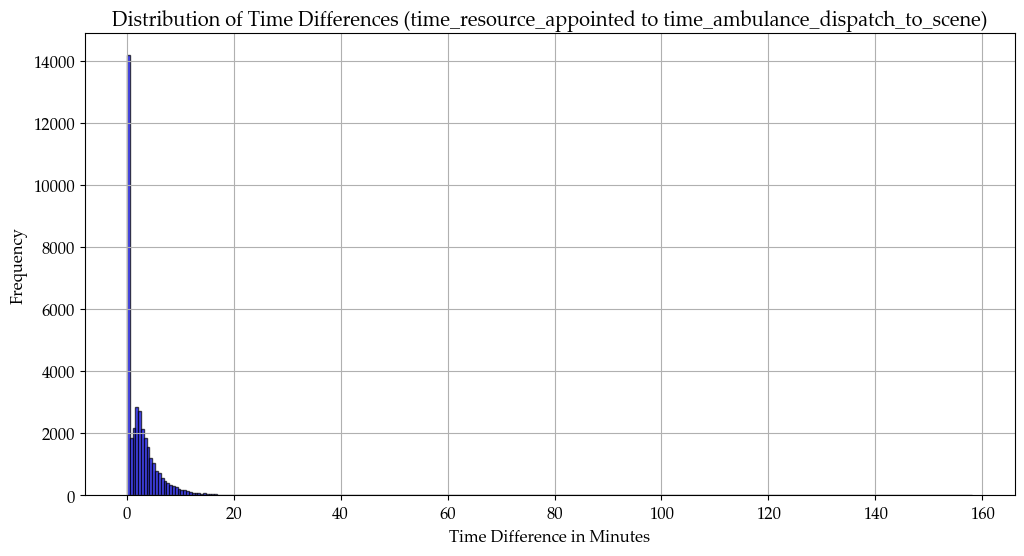

Mean time difference: 2.9085042127929523 minutes
Median time difference: 1.6833333333333333 minutes
Standard deviation of time difference: 5.212701756953559 minutes
Maximum time difference: 158.16666666666666 minutes
Minimum time difference: 0.0 minutes
Percentage of time differences below 1 minutes: 42.50%


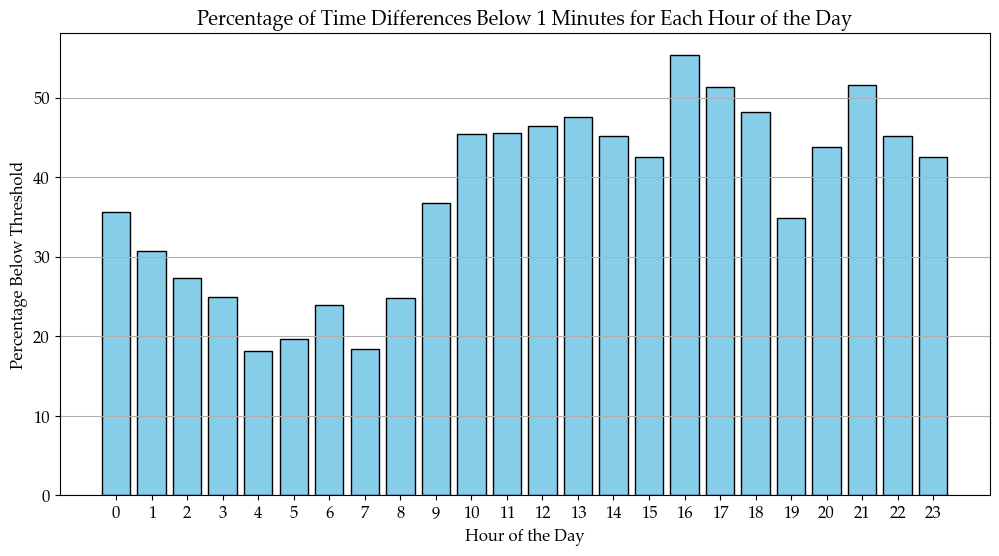



Dropped 0 (0.0%) rows


In [33]:
outlier_plotting(
    dataframe,
    triage_impression="V1",
    column_start="time_resource_appointed",
    column_end="time_ambulance_dispatch_to_scene",
    log_scale=False,
    z_score_threshold=3,
    bounds_to_use="z",
    percentage_threshold=1
)


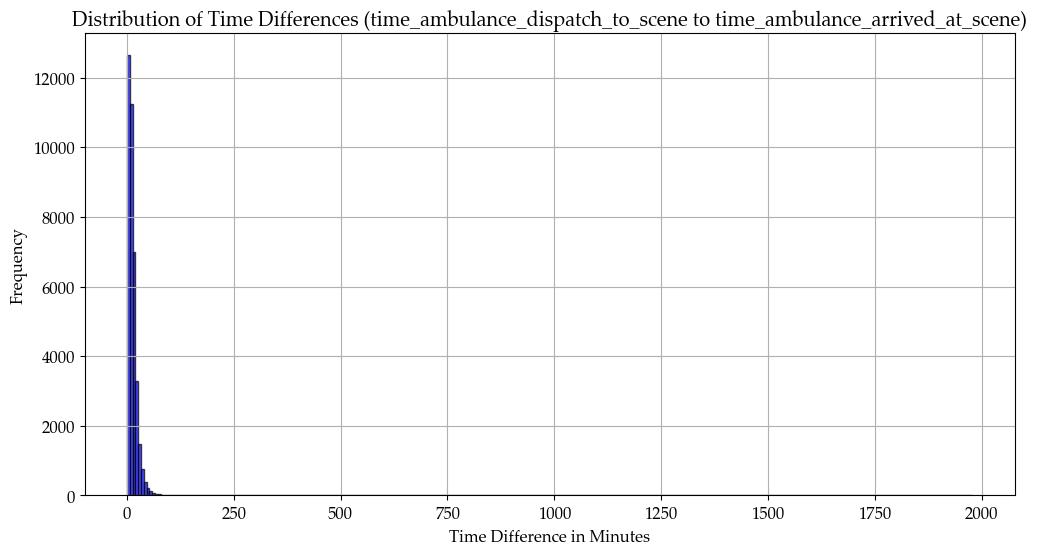

Mean time difference: 12.071618373674289 minutes
Median time difference: 10.033333333333333 minutes
Standard deviation of time difference: 14.956025391363282 minutes
Maximum time difference: 1978.4833333333333 minutes
Minimum time difference: 0.0 minutes
Suggested IQR upper bound for dropping rows: 8040.53 seconds
Suggested IQR lower bound for dropping rows: 29.16 seconds
Suggested Z-Score upper bound for dropping rows: 38233.15 seconds
Suggested Z-Score lower bound for dropping rows: 2.9 seconds


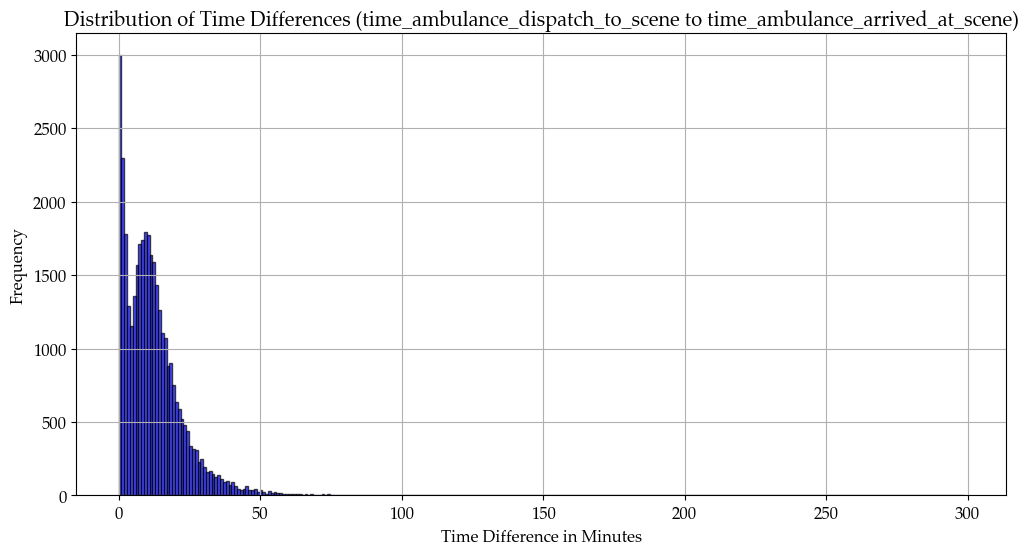

Mean time difference: 12.318209333846182 minutes
Median time difference: 10.3 minutes
Standard deviation of time difference: 10.92459417096517 minutes
Maximum time difference: 298.76666666666665 minutes
Minimum time difference: 0.05 minutes


Dropped 909 (0.31240978265352415%) rows


In [34]:
outlier_plotting(
    dataframe,
    triage_impression="V1",
    column_start="time_ambulance_dispatch_to_scene",
    column_end="time_ambulance_arrived_at_scene",
    log_scale=False,
    z_score_threshold=3,
    bounds_to_use="z"
)


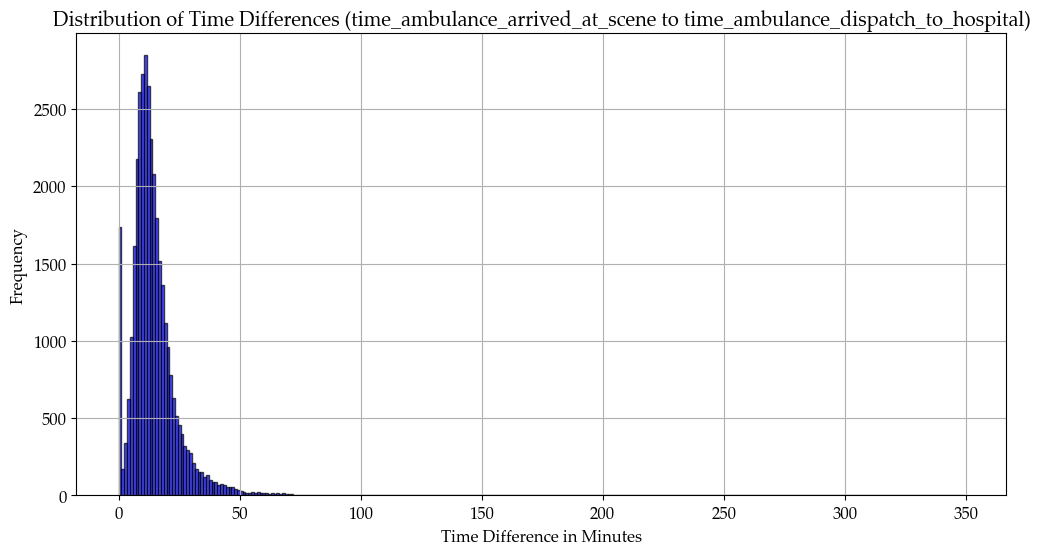

Mean time difference: 14.385096398484762 minutes
Median time difference: 12.416666666666666 minutes
Standard deviation of time difference: 10.269292166683774 minutes
Maximum time difference: 349.28333333333336 minutes
Minimum time difference: 0.0 minutes
Percentage of time differences below 60 minutes: 99.43%


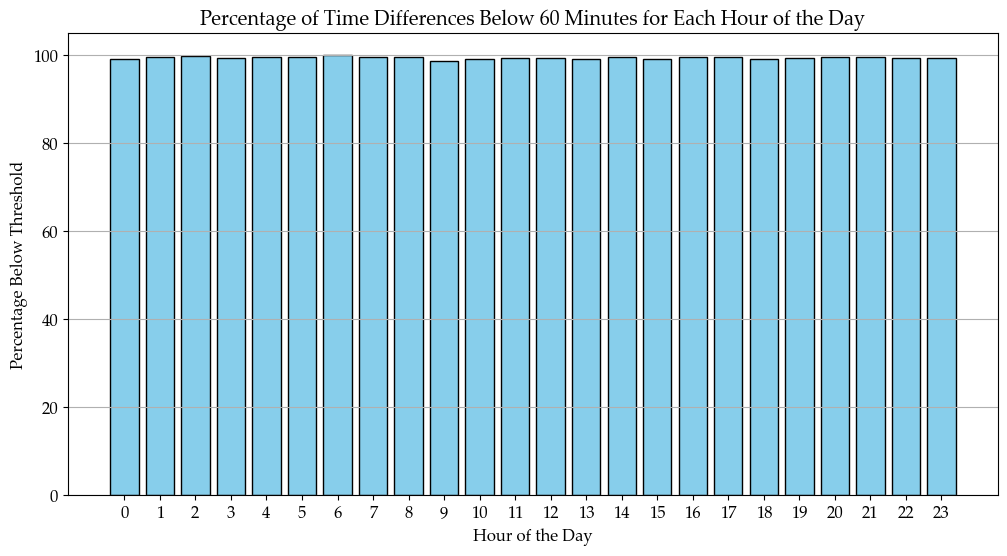

Suggested IQR upper bound for dropping rows: 3095.34 seconds
Suggested IQR lower bound for dropping rows: 178.38 seconds
Suggested Z-Score upper bound for dropping rows: 24653.8 seconds
Suggested Z-Score lower bound for dropping rows: 13.9 seconds


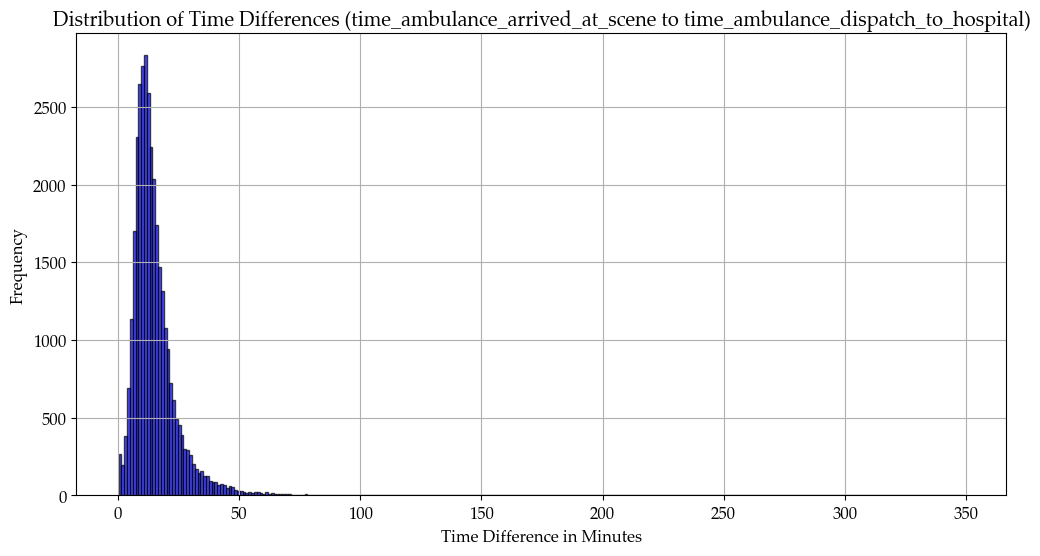

Mean time difference: 15.018488945302122 minutes
Median time difference: 12.766666666666667 minutes
Standard deviation of time difference: 10.031863466885001 minutes
Maximum time difference: 349.28333333333336 minutes
Minimum time difference: 0.23333333333333334 minutes
Percentage of time differences below 60 minutes: 99.40%


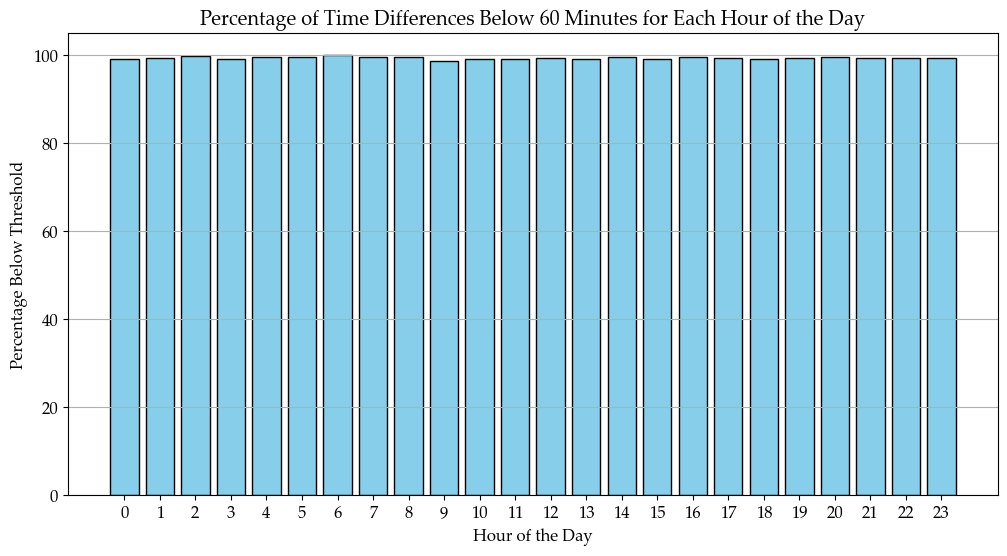



Dropped 1497 (0.5144966387594342%) rows


In [35]:
outlier_plotting(
    dataframe,
    triage_impression="V1",
    column_start="time_ambulance_arrived_at_scene",
    column_end="time_ambulance_dispatch_to_hospital",
    log_scale=False,
    z_score_threshold=3,
    bounds_to_use="z",
    percentage_threshold=60
)


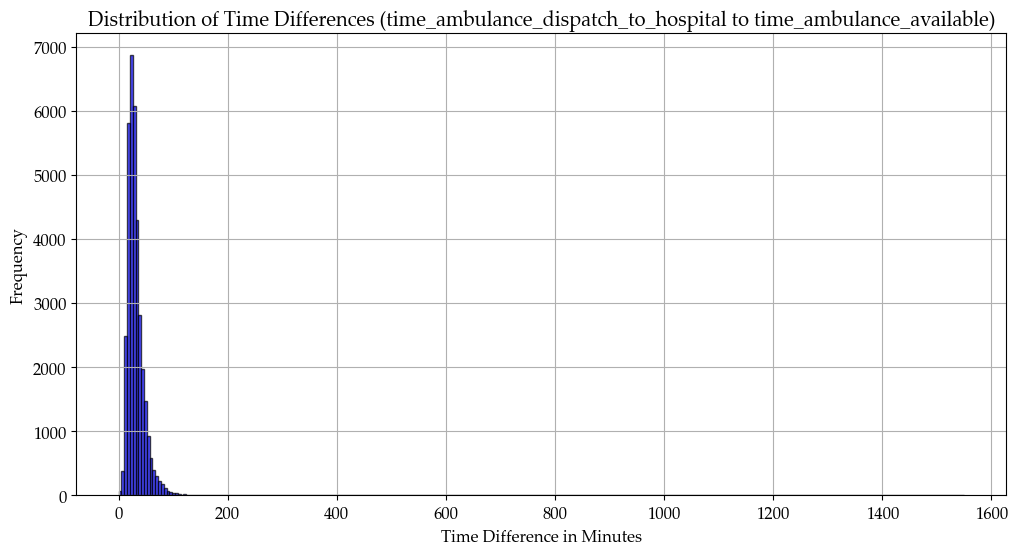

Mean time difference: 31.7790811518818 minutes
Median time difference: 27.433333333333334 minutes
Standard deviation of time difference: 31.498896627706802 minutes
Maximum time difference: 1550.0666666666666 minutes
Minimum time difference: 0.0 minutes
Percentage of time differences below 30 minutes: 58.39%


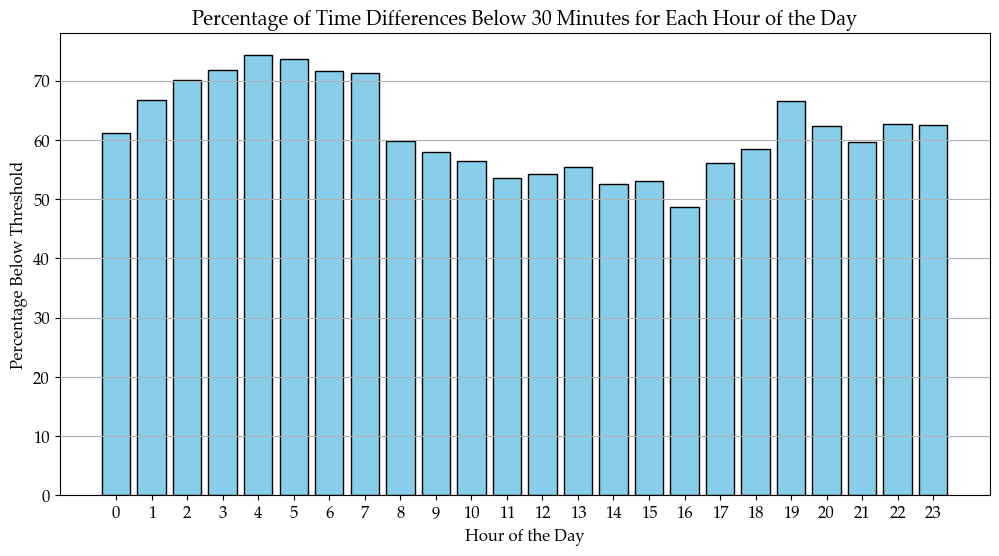

Suggested IQR upper bound for dropping rows: 5272.71 seconds
Suggested IQR lower bound for dropping rows: 523.28 seconds
Suggested Z-Score upper bound for dropping rows: 7524.3 seconds
Suggested Z-Score lower bound for dropping rows: 370.81 seconds


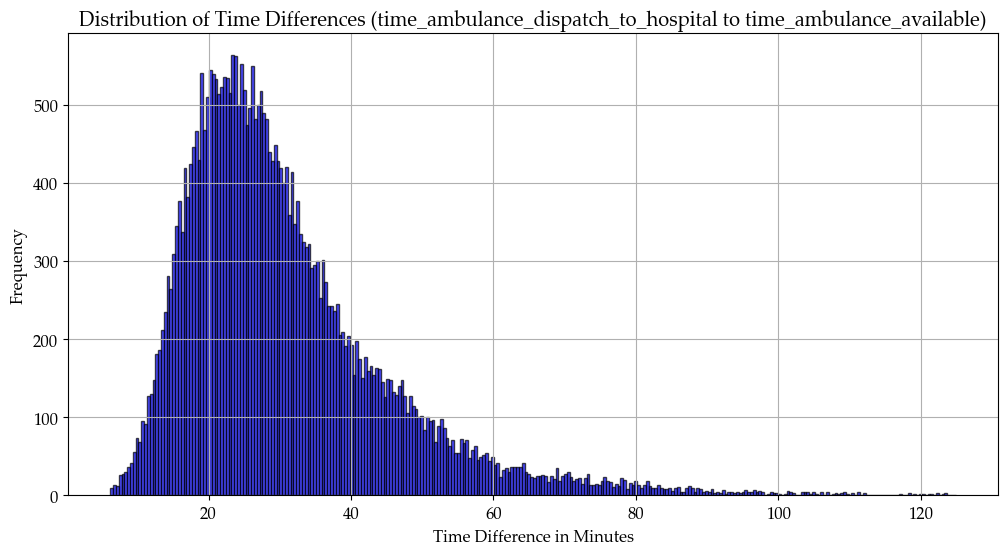

Mean time difference: 30.86121042460069 minutes
Median time difference: 27.433333333333334 minutes
Standard deviation of time difference: 14.854505891675212 minutes
Maximum time difference: 124.88333333333334 minutes
Minimum time difference: 6.216666666666667 minutes
Percentage of time differences below 30 minutes: 58.43%


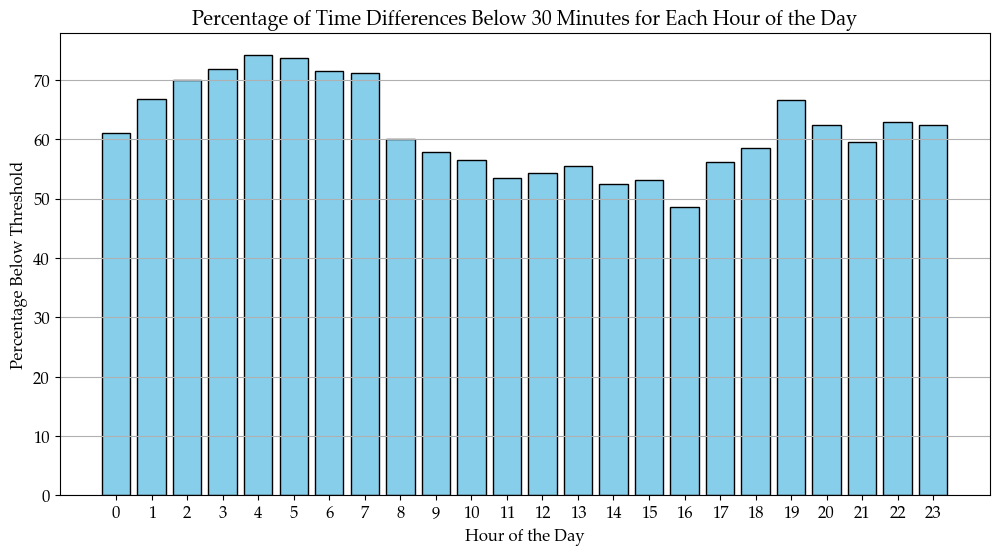



Dropped 188 (0.06461280433318212%) rows


In [36]:
outlier_plotting(
    dataframe,
    triage_impression="V1",
    column_start="time_ambulance_dispatch_to_hospital",
    column_end="time_ambulance_available",
    log_scale=False,
    z_score_threshold=3,
    bounds_to_use="z",
    percentage_threshold=30
)


37307
1933


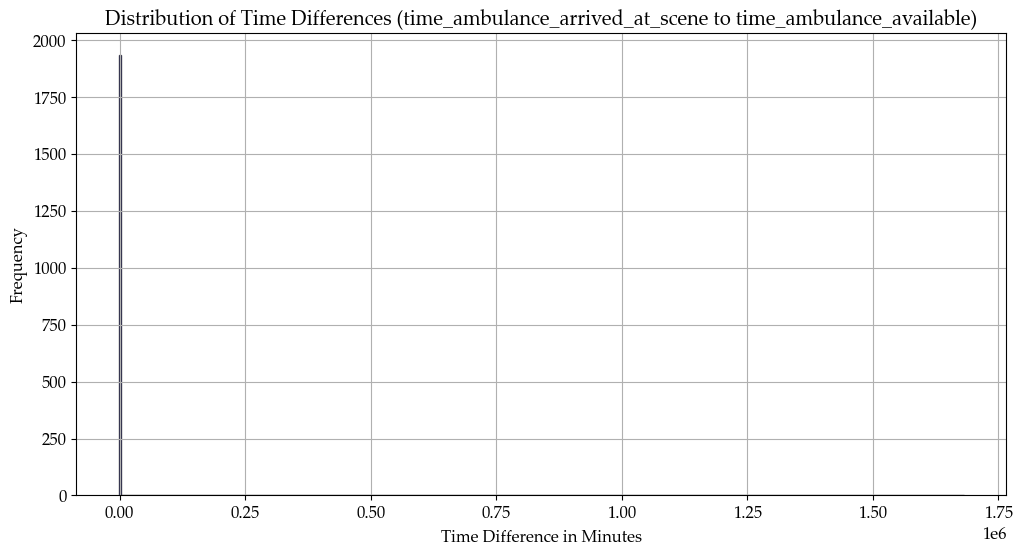

Mean time difference: 898.2484824969823 minutes
Median time difference: 19.183333333333334 minutes
Standard deviation of time difference: 38254.72681908644 minutes
Maximum time difference: 1681927.7166666666 minutes
Minimum time difference: -1975.65 minutes
Percentage of time differences below 30 minutes: 68.29%


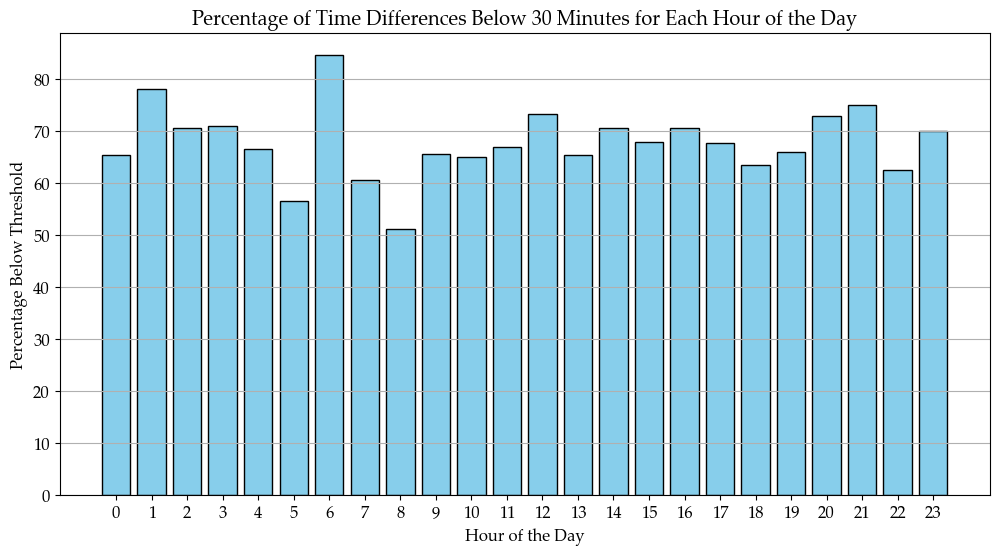

Suggested IQR upper bound for dropping rows: 14732.8 seconds
Suggested IQR lower bound for dropping rows: 80.67 seconds
Suggested Z-Score upper bound for dropping rows: 35947.24 seconds
Suggested Z-Score lower bound for dropping rows: 26.47 seconds


c:\Programming\GitHub\Data-Processing\.venv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


37271
1897


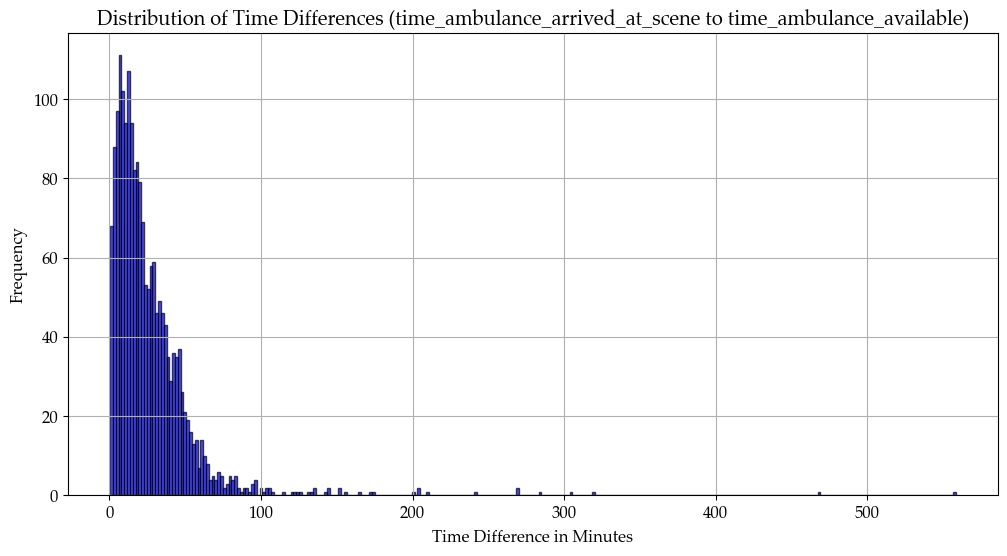

Mean time difference: 26.974345457740288 minutes
Median time difference: 19.55 minutes
Standard deviation of time difference: 31.78147232309027 minutes
Maximum time difference: 558.4 minutes
Minimum time difference: 0.45 minutes
Percentage of time differences below 30 minutes: 67.95%


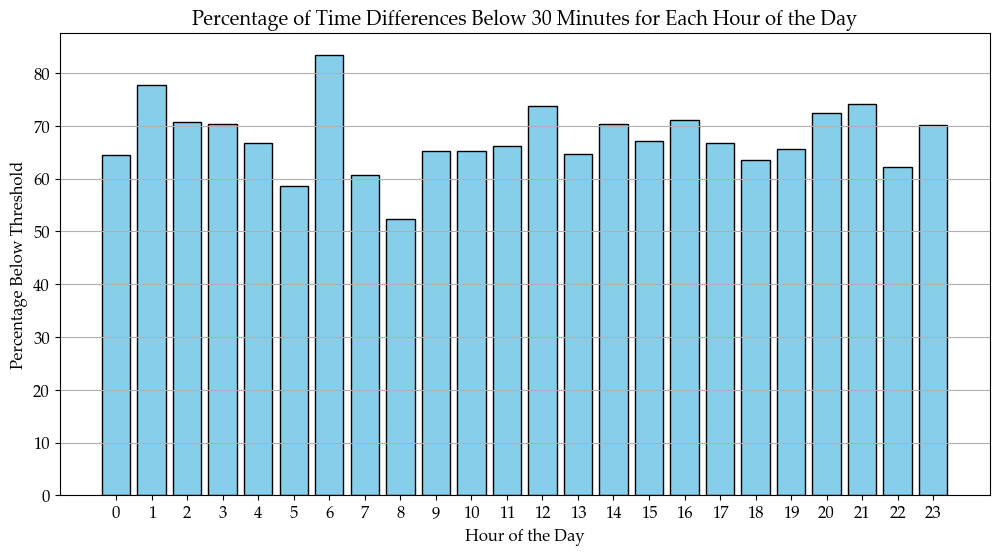



Dropped 36 (0.01237266465954551%) rows


In [37]:
outlier_plotting(
    dataframe,
    triage_impression="V1",
    column_start="time_ambulance_arrived_at_scene",
    column_end="time_ambulance_available",
    cancelled=True,
    log_scale=False,
    z_score_threshold=3,
    bounds_to_use="z",
    percentage_threshold=30
)
